
<hr style = "height : 2px; background-color: blue;">

<center> <h1 style = "font-family: Castellar;font-size: 25px; text-shadow: 1px 5px 10px blue; letter-spacing: 5px;"> Car Price Prediction on Car Dekho Dataset </h1></center>

<center> <h2 style = "font-family: Copperplate Gothic Light; font-size: 20px; text-shadow: 1px 10px 10px yellow;letter-spacing: 5px;"> A - Level Major Project NIELIT Delhi </h2></center>

<p style = "font-family: Lucida Calligraphy; font-size: 18px; letter-spacing: 5px;text-align: right; font-weight: bold; text-shadow: 1px 10px 10px yellow;"> By Harish Chandra </p>

<hr style = "height : 2px; background-color: blue;">

<div style = "font-family: lucida calligraphy; font-size: 15px; border : 3px solid black; border-radius: 10px; padding: 20px">
<h1>Table of contents</h1>

1. [Importing Libraries and Dataset](#1)<br>
2. [Data Understanding](#2)<br>
3. [Data Cleaning & EDA](#3)<br>
4. [Data Preprocessing](#4)<br>
5. [Splitting Dataset into Train & Test sets](#5)<br>
6. [Model Building](#6)<br>
7. [Model Evaluation](#7)<br>
8. [Generating pickle](#8)<br>
9. [Testing Model by User Input](#9)<br>

</div>

<a id="1"></a>
<div style = "font-family: Copperplate Gothic Light; font-size: 30px; border : 3px solid black; border-radius: 50px 0; padding: 20px; background : blue; color: #FFF; text-align: center"> Importing Required Libraries </div>

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import datetime

import warnings
warnings.filterwarnings("ignore")

import missingno as msno
from scipy.stats import norm, skew

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id="2"></a>
<div style = "font-family: Copperplate Gothic Light; font-size: 30px; border : 3px solid black; border-radius: 50px 0; padding: 20px; background : blue; color: #FFF; text-align: center"> Data Understanding </div> 

<div style = "font-family: Garamond; font-size: 20px; border : 3px solid black; border-radius: 10px; padding: 20px">
    
This dataset contains information about used cars.
This data can be used for a lot of purpose such as price prediction to exempilify the use of linear regression in Machine Learning.
    
### The columns in the given dataset are as follows:
<table style = "font-size: 15px; border : 3px solid black; border-radius: 10%; padding: 20px">
    <tr>
        <th style = "text-align:left">Columns</th>
        <th style = "text-align:left">Description</th>
    </tr>
    <tr>
        <td style = "text-align:left"> 1. name </td>
        <td style = "text-align:left"> Name of the cars. </td>
    </tr>
    <tr>
        <td style = "text-align:left"> 2. year </td>
        <td style = "text-align:left"> Year of the car when it was bought. </td>
    </tr>
    <tr>
        <td style = "text-align:left"> 3. selling_price </td>
        <td style = "text-align:left"> Price at which the car is being sold. </td>
    </tr>
    <tr>
        <td style = "text-align:left"> 4. km_driven </td>
        <td style = "text-align:left"> Number of kilometres the car is driven.</td>
    </tr>
    <tr>
        <td style = "text-align:left"> 5. fuel </td>
        <td style = "text-align:left"> Fuel type of the car (Diesel / Petrol / CNG / LPG).</td>
    </tr>
    <tr>
        <td style = "text-align:left"> 6. seller_type </td>
        <td style = "text-align:left"> Tell if a Seller is Individual or a Dealer. </td>
    </tr>
    <tr>
        <td style = "text-align:left"> 7. transmission </td>
        <td style = "text-align:left"> Gear transmission of the car (Automatic / Manual). </td>
    </tr>
    <tr>
        <td style = "text-align:left"> 8. owner </td>
        <td style = "text-align:left"> Number of previous owners of the car. </td>
    </tr>
    <tr>
        <td style = "text-align:left"> 9. mileage </td>
        <td style = "text-align:left"> How many kilometers is vehicle going to run per litre of fuel. </td>
    </tr>
    <tr>
        <td style = "text-align:left"> 10. engine </td>
        <td style = "text-align:left"> The amount of air and fuel that can be pushed through the cylinders in the engine. </td>
    </tr>
    <tr>
        <td style = "text-align:left"> 11. max_power </td>
        <td style = "text-align:left"> Max power is the rate at which or how rapidly the work gets accomplished. </td>
    </tr>
    <tr>
        <td style = "text-align:left"> 12. seats </td>
        <td style = "text-align:left"> Number of seats in the cars. </td>
    </tr>
</table>
</div>

In [2]:
carData = pd.read_excel("Cardekho-Dataset.xlsx")
carData.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [3]:
carData.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [4]:
print("fuel variable have {} unique category : {}".format(carData['fuel'].nunique(), carData['fuel'].unique()))
print("seller_type variable have {} unique category : {}".format(carData['seller_type'].nunique(), carData['seller_type'].unique()))
print("transmission variable have {} unique category : {}".format(carData['transmission'].nunique(), carData['transmission'].unique()))
print("owner variable have {} unique category : {}".format(carData['owner'].nunique(), carData['owner'].unique()))

fuel variable have 4 unique category : ['Diesel' 'Petrol' 'LPG' 'CNG']
seller_type variable have 3 unique category : ['Individual' 'Dealer' 'Trustmark Dealer']
transmission variable have 2 unique category : ['Manual' 'Automatic']
owner variable have 5 unique category : ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [5]:
print("The size of DataFrame is",carData.shape,"\n")
carData.info()

The size of DataFrame is (8128, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


<ul style = "border : 2px dashed black; border-radius: 10px; padding: 20px"><label style = "font-family: Garamond; font-size : 20px; text-transform : uppercase "> Basic info about dataset: </label>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> There are null values in 'mileage'(221), 'engine'(221), 'max_power'(215), 'seats'(221) variables. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> The dataset consists of 8128 rows and 12 columns. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Of the variables, 6 are object, 3 are integer and 3 are float. </li>
</ul>
<br/>
<div style = "font-family: Garamond; font-size : 20px;"> Target variable here is <span style = "color : red; font-weight: bold"> selling_price </span></div>

In [6]:
carData['max_power'] = carData['max_power'].replace({" ": np.NaN})

In [7]:
carData['max_power'] = carData['max_power'].astype('float64')

In [8]:
# Descriptive statistical summary of numerical features
carData.describe().T

,count,mean,std,min,25%,50%,75%,max
year,8128.0,2013.804011,4.044249,1983.0,2011.00,2015.0,2017.00,2020.0
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.00,450000.0,675000.00,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.00,60000.0,98000.00,2360457.0
mileage,7907.0,19.418783,4.037145,0.0,16.78,19.3,22.32,42.0
engine,7907.0,1458.625016,503.916303,624.0,1197.00,1248.0,1582.00,3604.0
max_power,7912.0,91.517919,35.822499,0.0,68.05,82.0,102.00,400.0
seats,7907.0,5.416719,0.959588,2.0,5.00,5.0,5.00,14.0


<ul style = "border : 2px dashed black; border-radius: 10px; padding: 20px"><label style = "font-family: Garamond; font-size : 20px; text-transform : uppercase "> Description of numeric variables: </label>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> The oldest car was produced in 1983 and the newest car was produced in 2020. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Minimum selling price is 29999 INR and maximum selling price is 10000000 INR. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> The driving distance of the least driven car is l km, the most driven car's driving distance is 2360457 Km, and average driving distance is 69819 km. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> The number of seats of cars changes from 2 seats to 14 seats. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Minimum mileage is 0, maximum mileage is 42, and average mileage is 19.4. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Engine volume changes from 624 to 3604 and average is 1458. </li>
</ul>


In [9]:
# Descriptive statistical summary of categorical features
carData.describe(include= 'object').T

,count,unique,top,freq
name,8128,2058,Maruti Swift Dzire VDI,129
fuel,8128,4,Diesel,4402
seller_type,8128,3,Individual,6766
transmission,8128,2,Manual,7078
owner,8128,5,First Owner,5289


<ul style = "border : 2px dashed black; border-radius: 10px; padding: 20px"><label style = "font-family: Garamond; font-size : 20px; text-transform : uppercase "> About categoric variables: </label>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Car name with highest frequency : Maruti Swift Dzire VDI (freq = 129). </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Fuel kind with highest frequency : Diesel (freq = 4402). </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Seller type with highest frequency : Individual (6766). </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Transmission type with highest frequency : Manual (freq = 7078). </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Owner type with highest frequency : First owner (freq = 5289). </li>
</ul>


<a id="3"></a>
<div  style = "font-family: Copperplate Gothic Light; font-size: 30px; border : 3px solid black; border-radius: 50px 0; padding: 20px; background : blue; color: #FFF; text-align: center"> Data Cleaning & EDA <br/> <span style = "font-family: Garamond; font-size : 30px;"> Checking missing value, visualize and fill them </span>
</div>

In [10]:
carData.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
seats            221
dtype: int64

<Axes: >

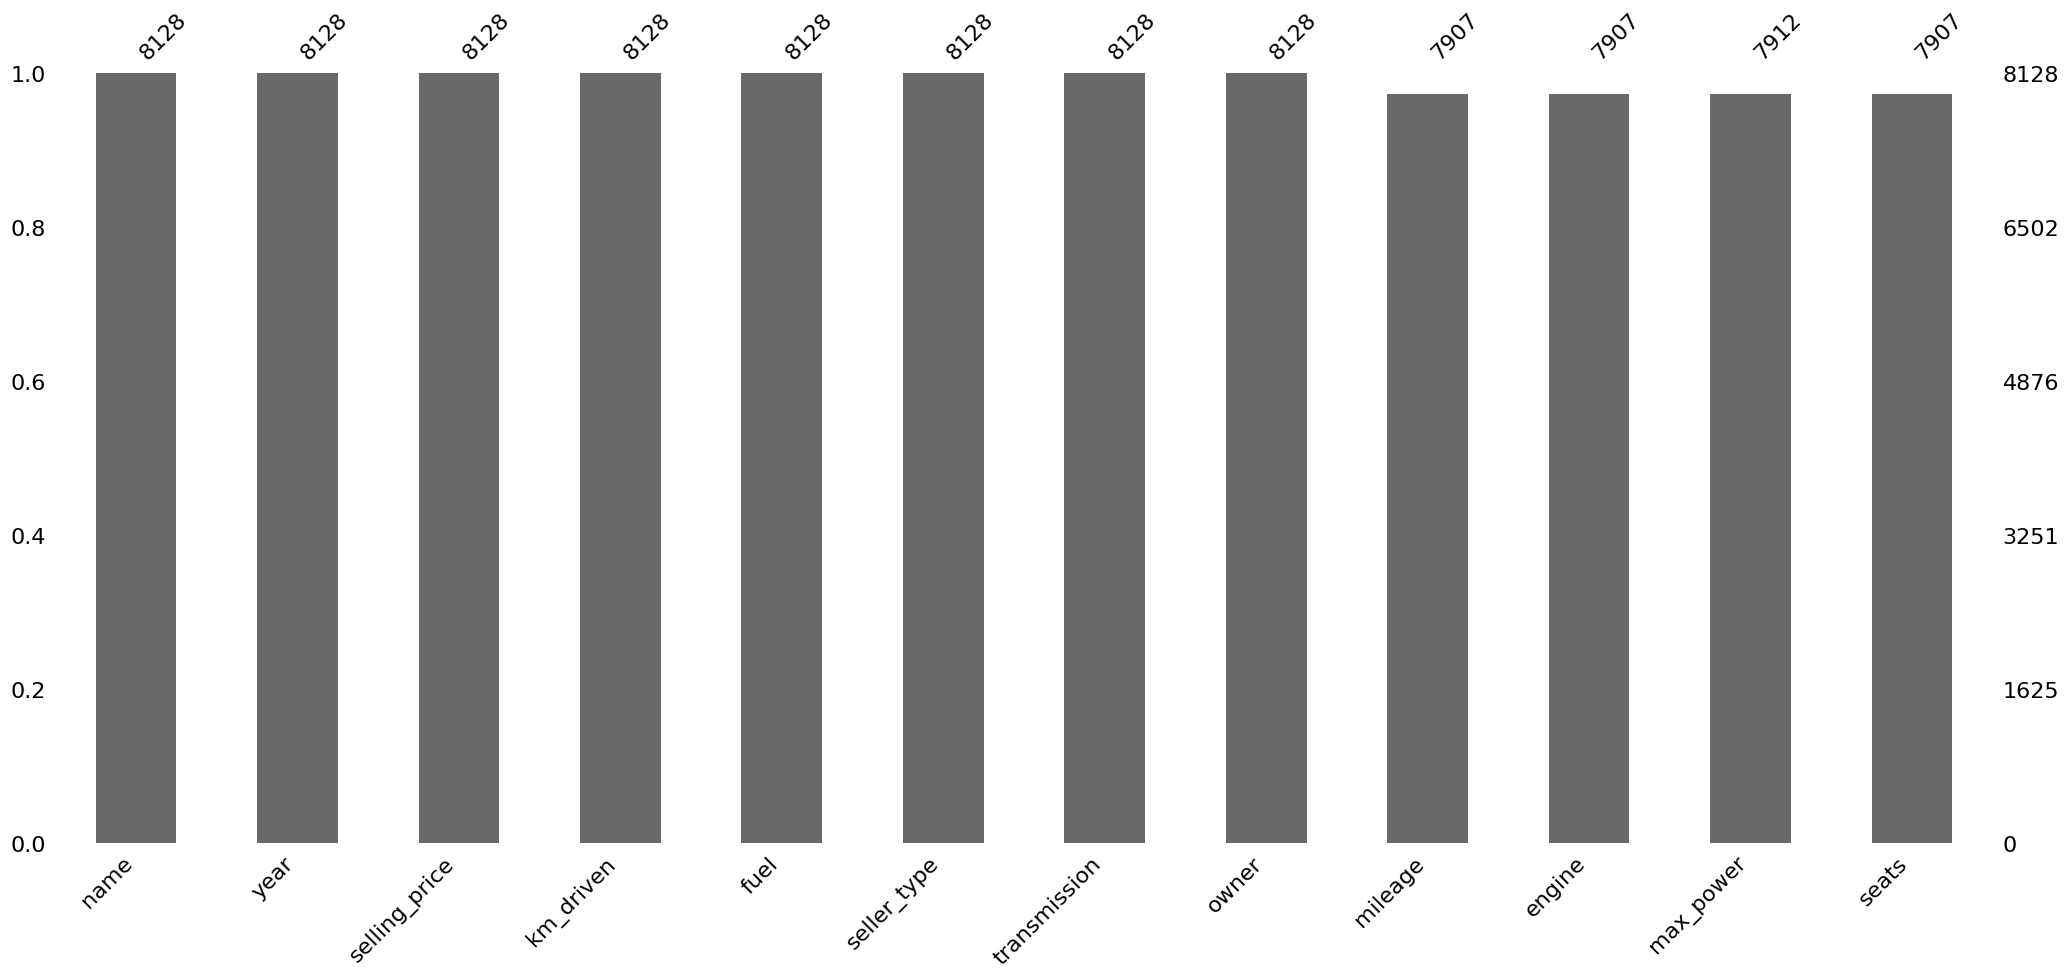

In [11]:
msno.bar(carData)

<div style = "font-family: Garamond; font-size : 20px;"> there are few missing values in  <span style = "color : red; font-weight: bold"> mileage, engine, max_power, seats columns </span></div>

In [12]:
carData['mileage'].fillna(18.9, inplace = True) # 18.9 is the mode value of mileage columns in car data set
carData['engine'].fillna(1248.0, inplace = True) # 1248.0 is the mode value of engine column in car data set
carData['max_power'].fillna(74.0, inplace = True) # 74.0 is the mode value of max power column in car- data set
carData['seats'].fillna(5.0, inplace = True) # 5.0 is the mode value seats column in car data set

<ul style = "border : 2px dashed black; border-radius: 10px; padding: 20px"><label style = "font-family: Garamond; font-size : 20px; text-transform : uppercase "> About filling nulls: </label>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Filled null values with mode of numeric variables with the code above. </li>
</ul>


In [13]:
print("-----------------------------------------------------------")
print("Fuel Wise Count Data\n",carData["fuel"].value_counts())
print("-----------------------------------------------------------")
print("Seller Type Wise Count Data\n",carData["seller_type"].value_counts())
print("-----------------------------------------------------------")
print("Transmission Wise Count Data\n",carData["transmission"].value_counts())
print("-----------------------------------------------------------")
print("Owner Wise Count Data\n",carData["owner"].value_counts())
print("-----------------------------------------------------------")
print("Seats Wise Count Data\n",carData["seats"].value_counts())
print("-----------------------------------------------------------")

-----------------------------------------------------------
Fuel Wise Count Data
 fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
-----------------------------------------------------------
Seller Type Wise Count Data
 seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64
-----------------------------------------------------------
Transmission Wise Count Data
 transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64
-----------------------------------------------------------
Owner Wise Count Data
 owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64
-----------------------------------------------------------
Seats Wise Count Data
 seats
5.0     6475
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0   

<div style = "font-family: Garamond; font-size : 20px;"> There are only 5 test drive cars and Only one car has 14 seat. These act as outliers which can lead to inaccurate predictions.</div>

In [14]:
carData.drop(carData[carData["owner"] == "Test Drive Car"].index, inplace = True)
carData.drop(carData[carData['seats'] == 14.0].index, inplace = True)

In [15]:
carData.drop(carData[carData["mileage"] == 0.0].index, inplace = True)

In [16]:
carData.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [17]:
# Let's see all column names
carData.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [18]:
# To Calculate how old the car is, I created new feature "car_age"
carData['car_age'] = (datetime.datetime.now().year) - (carData['year'])

carData.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,9
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,9
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,17
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,13
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,16


In [19]:
carData["brand"] = carData['name'].str.split(expand = True)[0]
carData['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [20]:
carData.drop(columns = ['name'], inplace = True)

In [21]:
pd.DataFrame(carData.groupby(["brand"]).year.count()).sort_values(ascending = False, by = 'year')

,year
brand,
Maruti,2448
Hyundai,1407
Mahindra,770
Tata,732
Toyota,488
Honda,466
Ford,397
Chevrolet,230
Renault,228


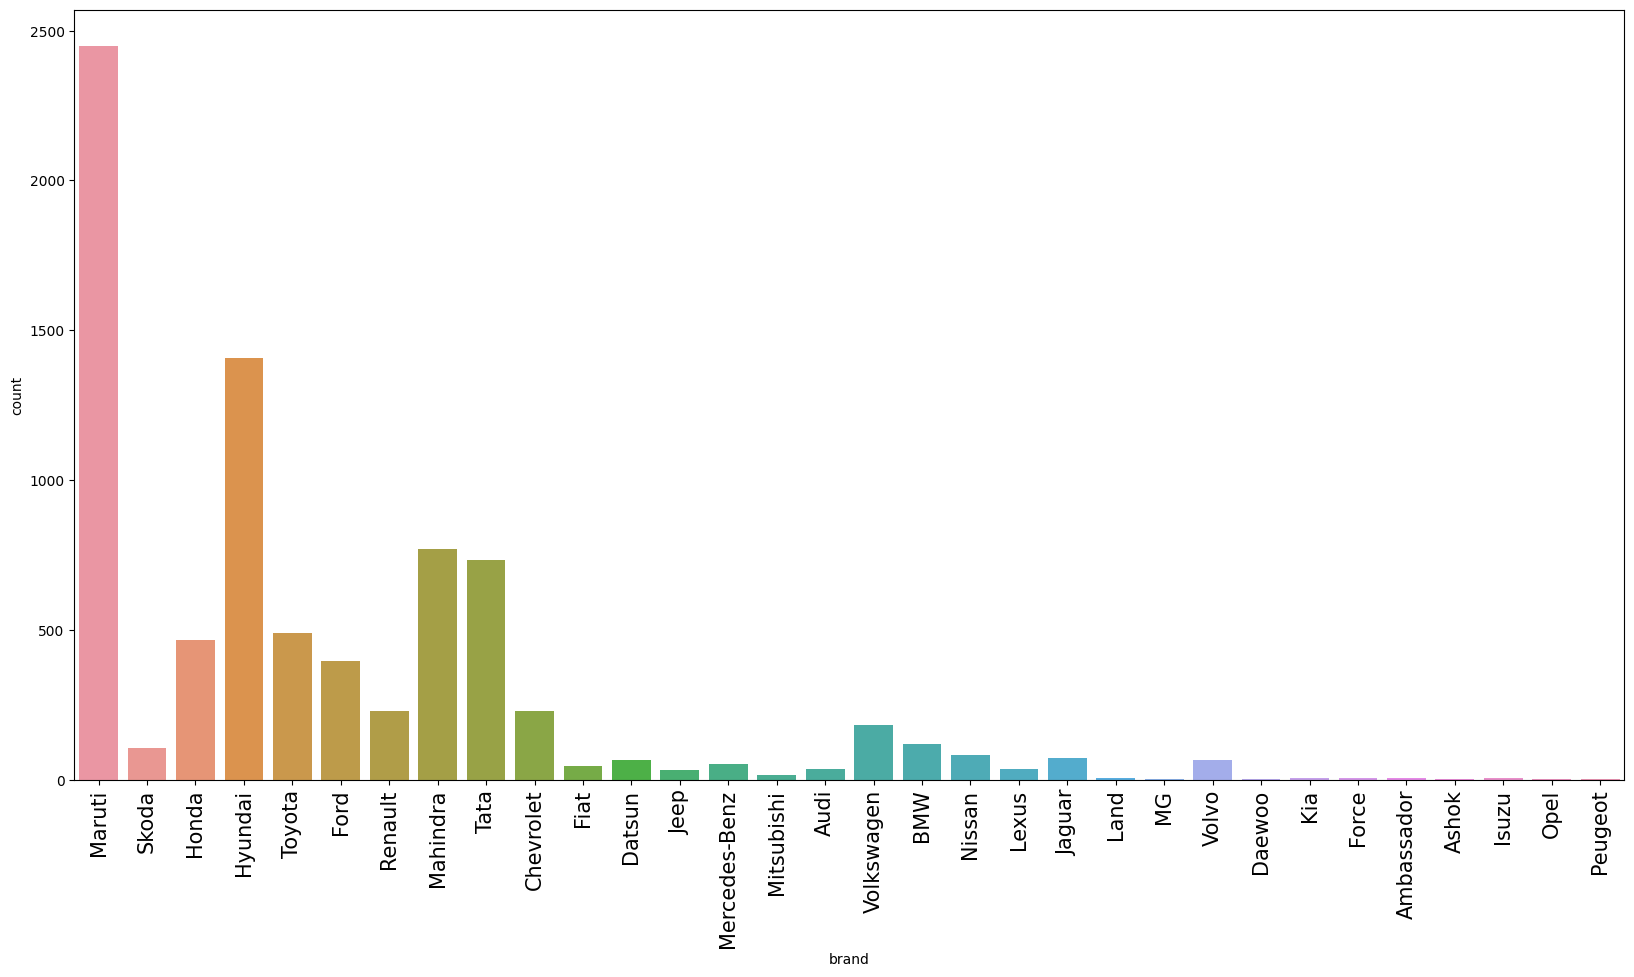

In [22]:
plt.figure(figsize = (20,10))
sns.countplot(x = "brand", data = carData)
plt.xticks(rotation = 90, size = 15)
plt.show()

<p style = "font-family: Garamond; font-size : 20px; font-weight : bold; text-transform : uppercase; border : 2px solid black; border-radius: 10px; padding: 20px;"> Dividing columns into numeric and categorical list for further analysis </p>

In [23]:
categorical_cols = ['year','fuel','seller_type','transmission','owner','brand']
numeric_cols = ['selling_price','km_driven','mileage','engine','max_power','seats','car_age']

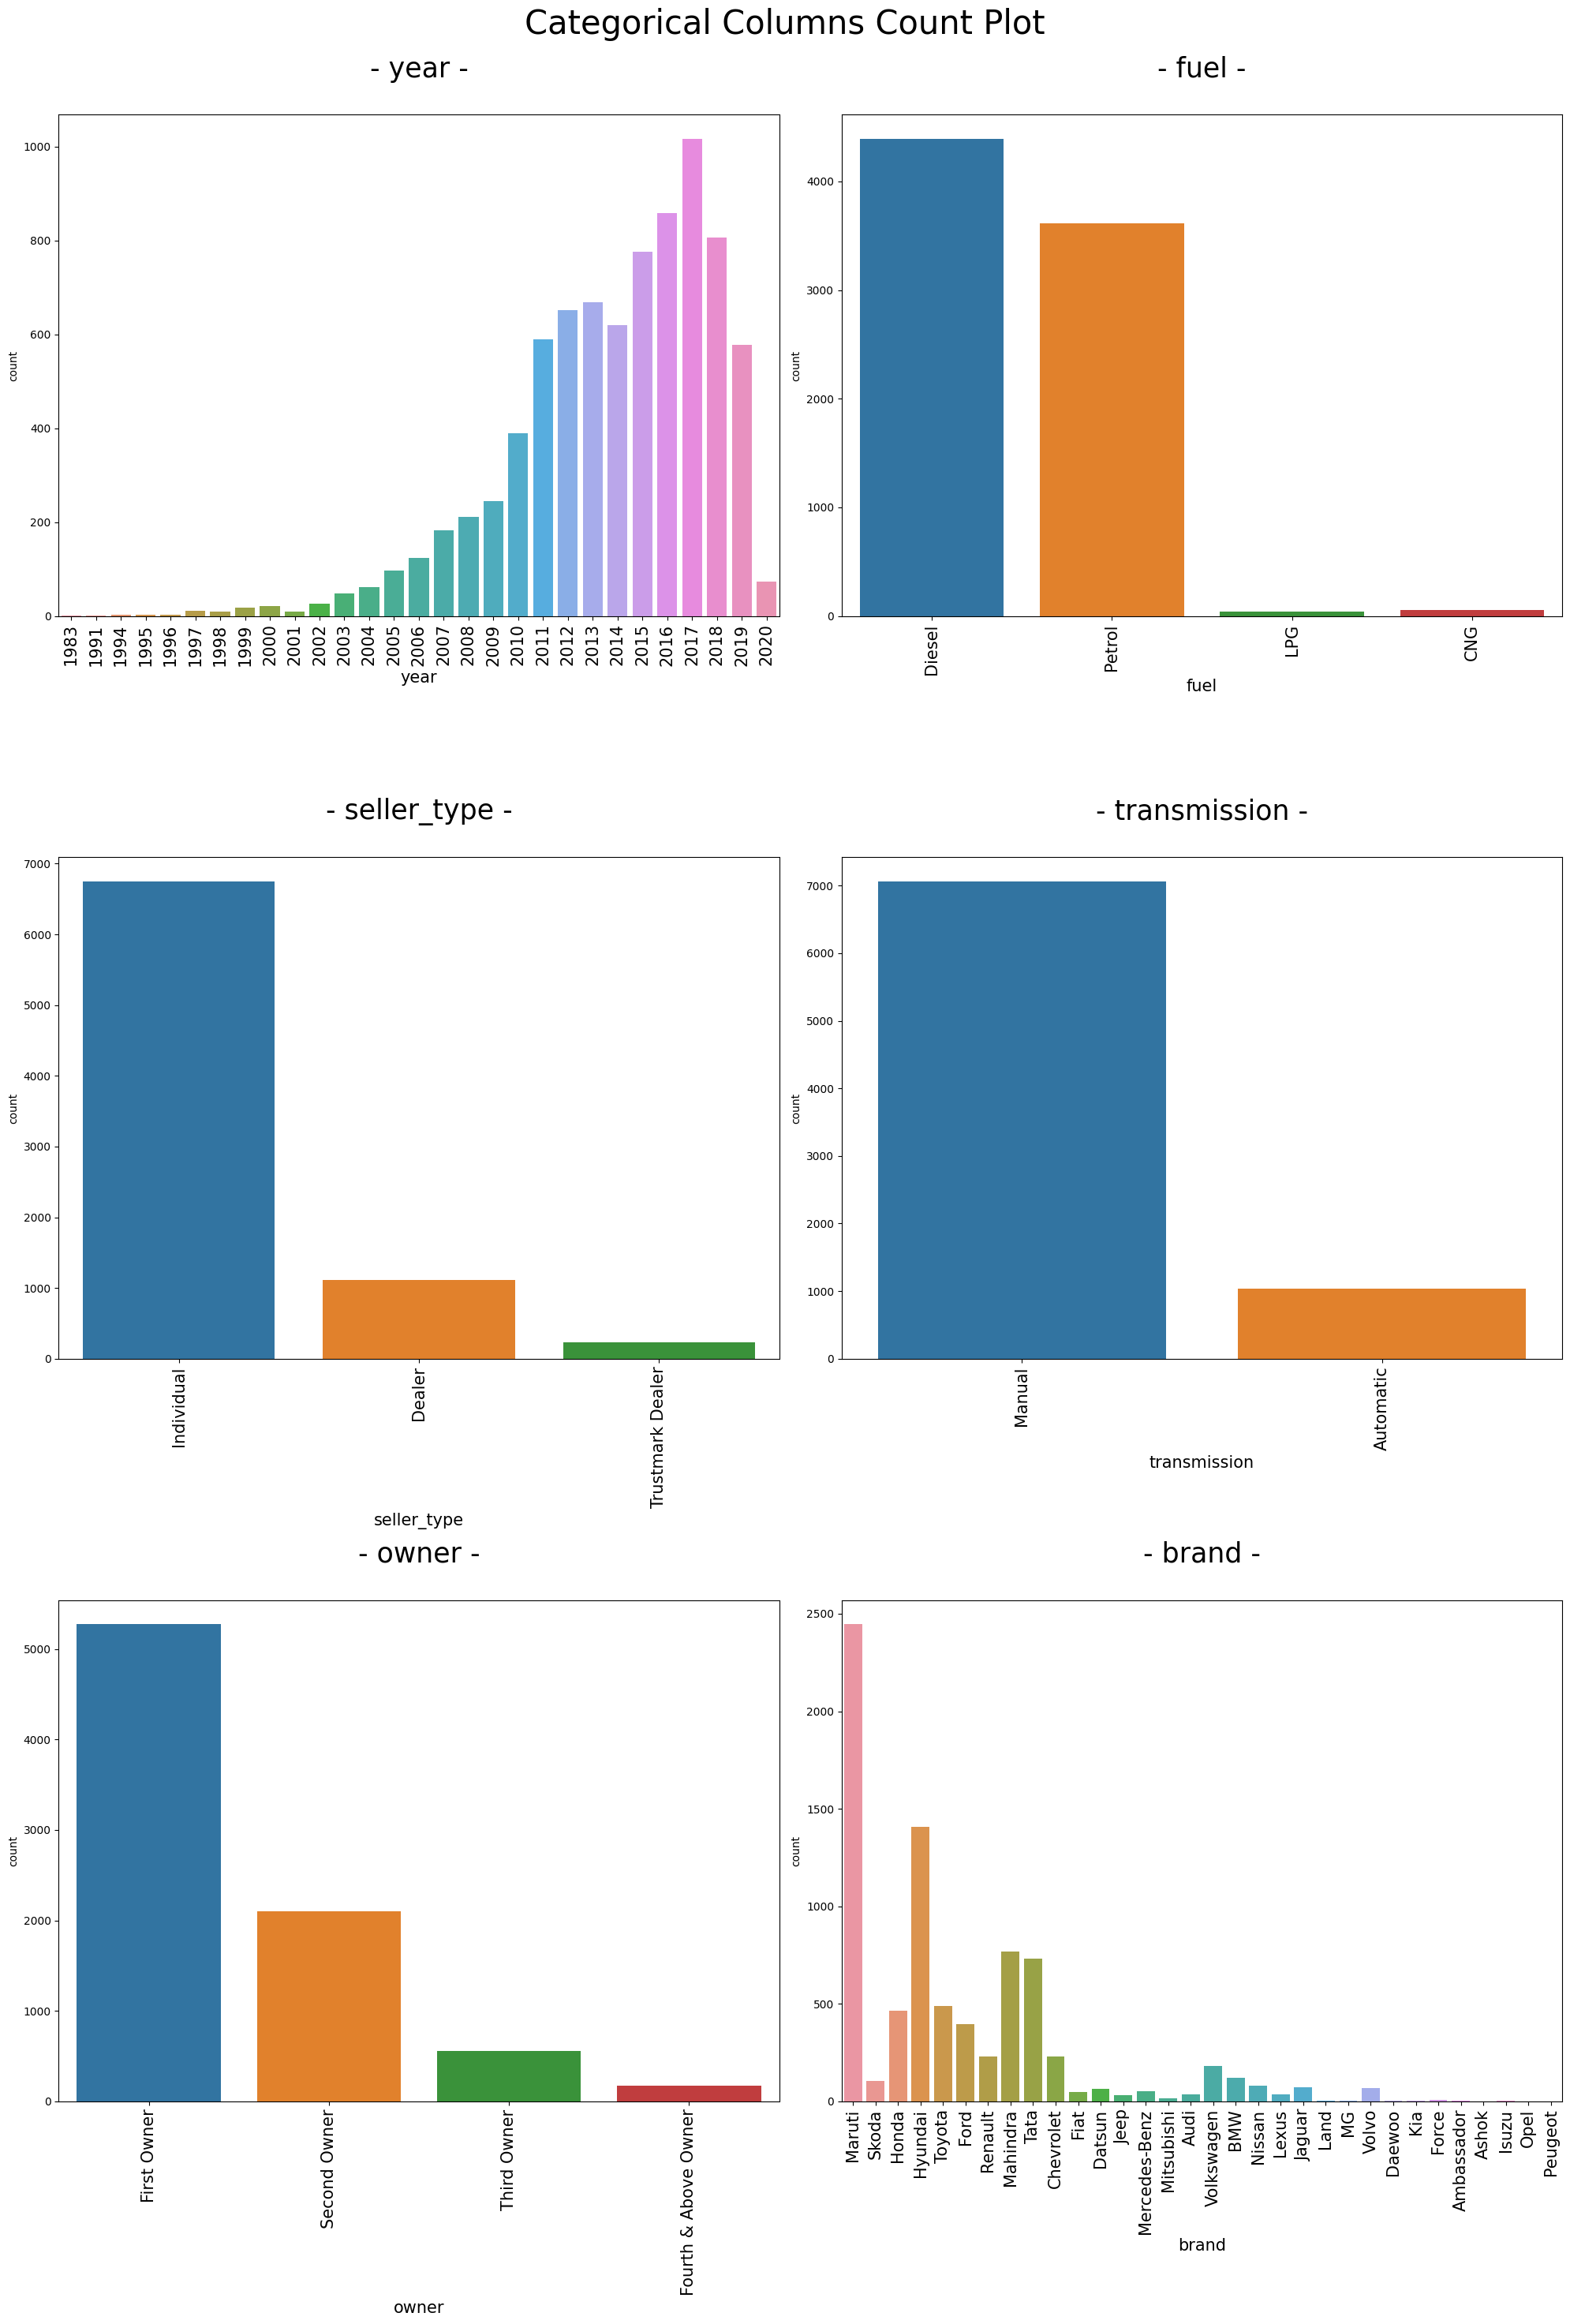

In [24]:
plt.figure(figsize = [20,30])
plt.suptitle("Categorical Columns Count Plot\n", fontsize = 30)
i = 1
for col in categorical_cols:
    plt.subplot(3,2,i)
    sns.countplot(x = carData[col], data = carData)
    plt.title(f"- {col} -\n", fontdict={'size':25})
    plt.xlabel(col, size = 15)
    plt.xticks(size = 15, rotation = 90)
    i = i + 1
plt.tight_layout()
plt.show()

<ul style = "font-family: Garamond; font-size : 20px; border : 2px solid black; border-radius: 10px; padding: 20px"><li style = "margin-left: 5%"> Analysis of Categorical Columns </li></ul>

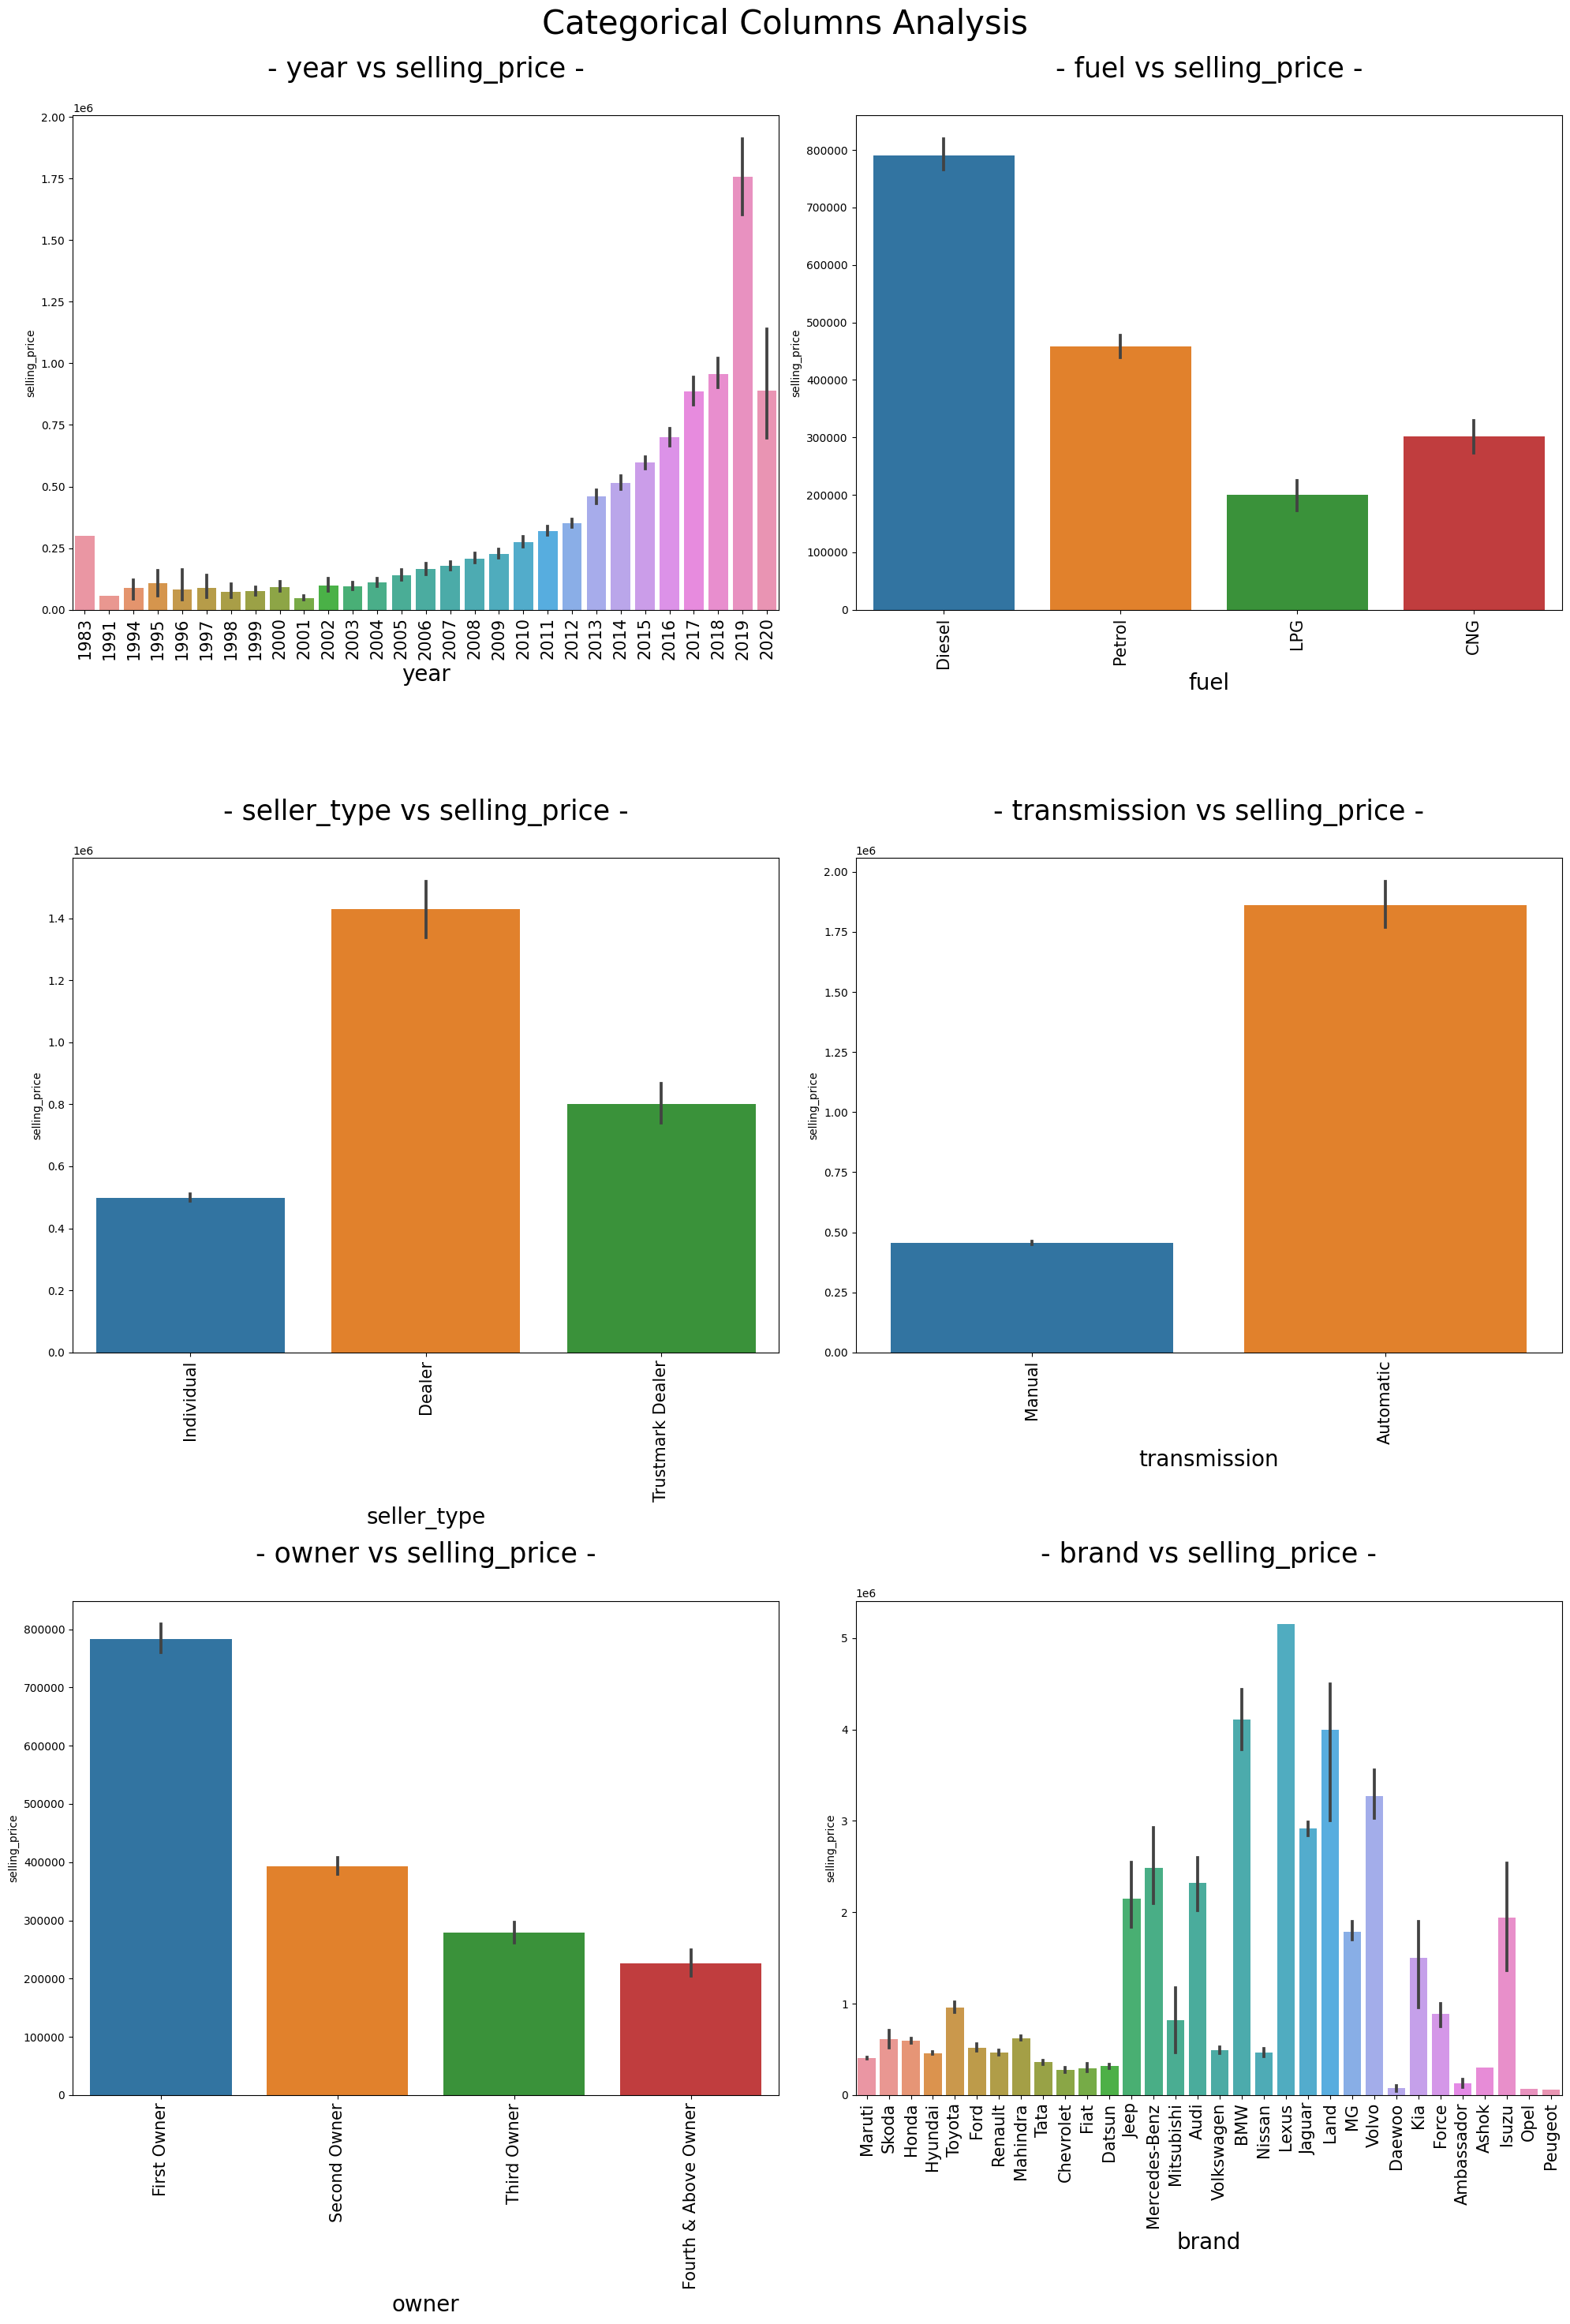

In [25]:
plt.figure(figsize = [20,30])
plt.suptitle("Categorical Columns Analysis\n", fontsize = 30)
i = 1
for col in categorical_cols:
    plt.subplot(3,2,i)
    sns.barplot(x = carData[col], y = carData["selling_price"])
    plt.title(f"- {col} vs selling_price -\n", fontdict={'size':25})
    plt.xlabel(col, size = 20)
    plt.xticks(size = 15, rotation = 90)
    i = i + 1
plt.tight_layout()
plt.show()

<ul style = "border : 2px dashed black; border-radius: 10px; padding: 20px"><label style = "font-family: Garamond; font-size : 20px; text-transform : uppercase "> Insights: </label>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> From the above we can infer that the selling price has increased in the Years 2015 - 2020. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Diesel cars have more selling price than other cars. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Dealers are pertaining to keep the selling price significantly high compared to individual sellers </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Automatic cars obviously are priced higher but the test drive cars are having huge prices compared to other classes. </li>
</ul>

<ul style = "font-family: Garamond; font-size : 20px; border : 2px solid black; border-radius: 10px; padding: 20px"><li style = "margin-left: 5%"> Analysis of Numeric Columns </li></ul>

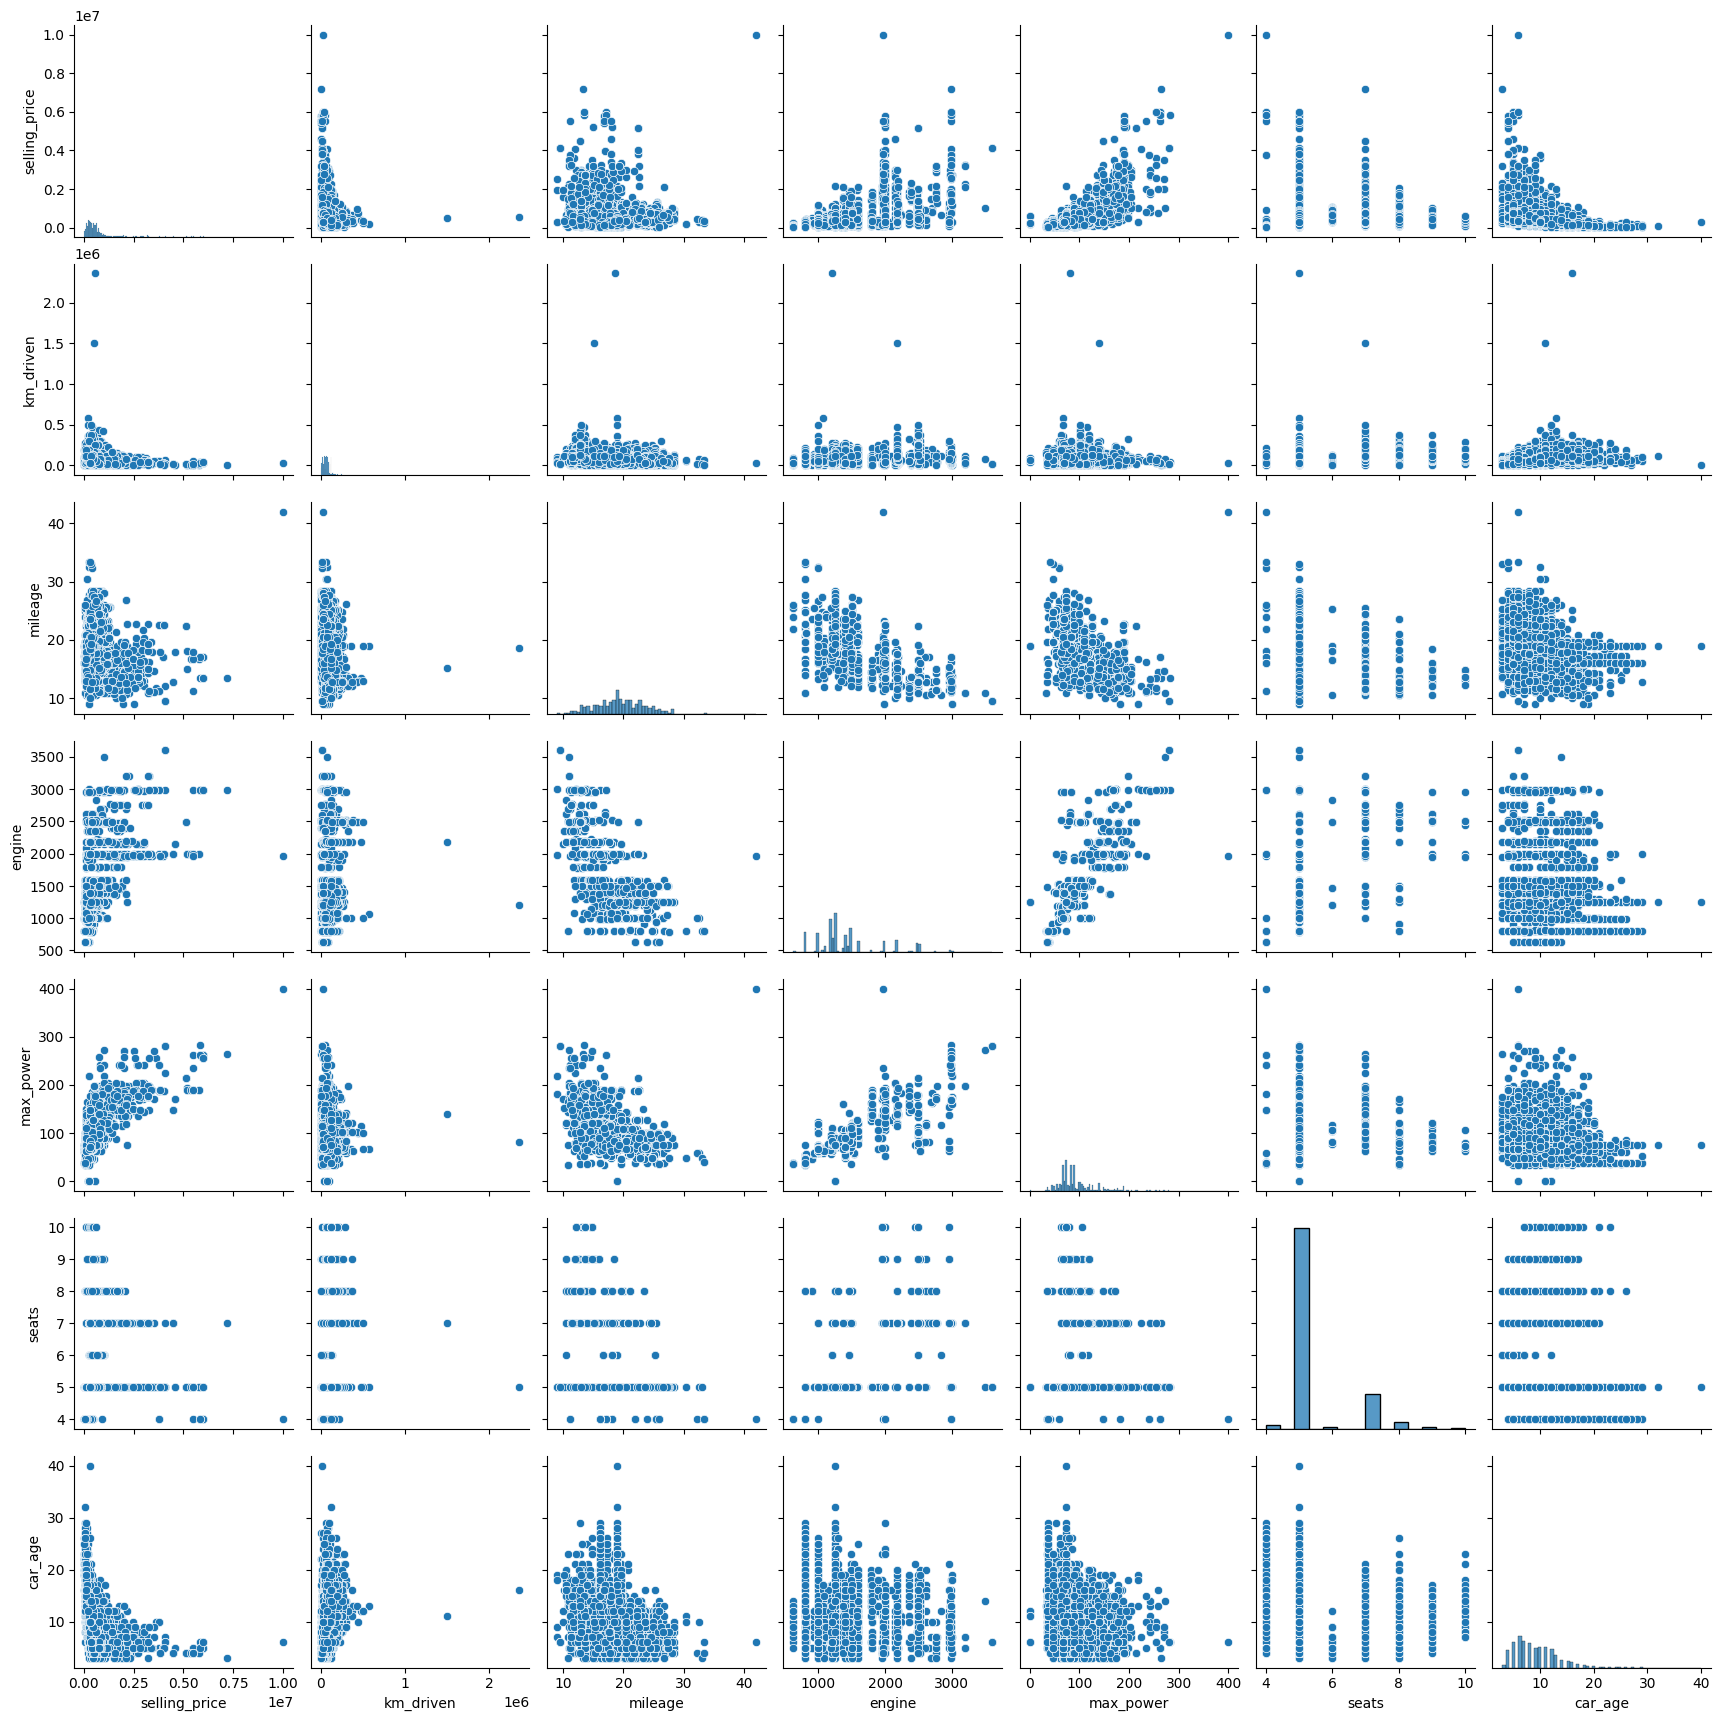

In [26]:
sns.pairplot(carData[numeric_cols])
plt.show()

<ul style = "border : 2px dashed black; border-radius: 10px; padding: 20px"><label style = "font-family: Garamond; font-size : 20px; text-transform : uppercase "> Insights: </label>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Engine and Max_power seems to have certain kind of correlationship. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Selling_price have correlationship with max_power,engine. </li>
</ul> 

In [27]:
carData[numeric_cols].corr()

,selling_price,km_driven,mileage,engine,max_power,seats,car_age
selling_price,1.000000,-0.225429,-0.124499,0.460181,0.749539,0.049924,-0.414487
km_driven,-0.225429,1.000000,-0.178931,0.199571,-0.042251,0.221222,0.417807
mileage,-0.124499,-0.178931,1.000000,-0.585507,-0.380085,-0.470482,-0.320782
engine,0.460181,0.199571,-0.585507,1.000000,0.705204,0.618973,-0.034589
max_power,0.749539,-0.042251,-0.380085,0.705204,1.000000,0.198656,-0.232816
seats,0.049924,0.221222,-0.470482,0.618973,0.198656,1.000000,-0.012448
car_age,-0.414487,0.417807,-0.320782,-0.034589,-0.232816,-0.012448,1.000000


<ul style = "border : 2px dashed black; border-radius: 10px; padding: 20px"><label style = "font-family: Garamond; font-size : 20px; text-transform : uppercase "> Correlation Deteted! </label><br>
    <i> As seen there is high correlation between some variable </i>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Between 'mileage' and 'engine' variables : -0.58 </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Between 'max_power' and 'engine' variables : 0.70 </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Between 'seats' and 'engine' variables : 0.61 </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Between 'max_power' and 'selling_price' variables : 0.74 </li>
</ul>


<Axes: >

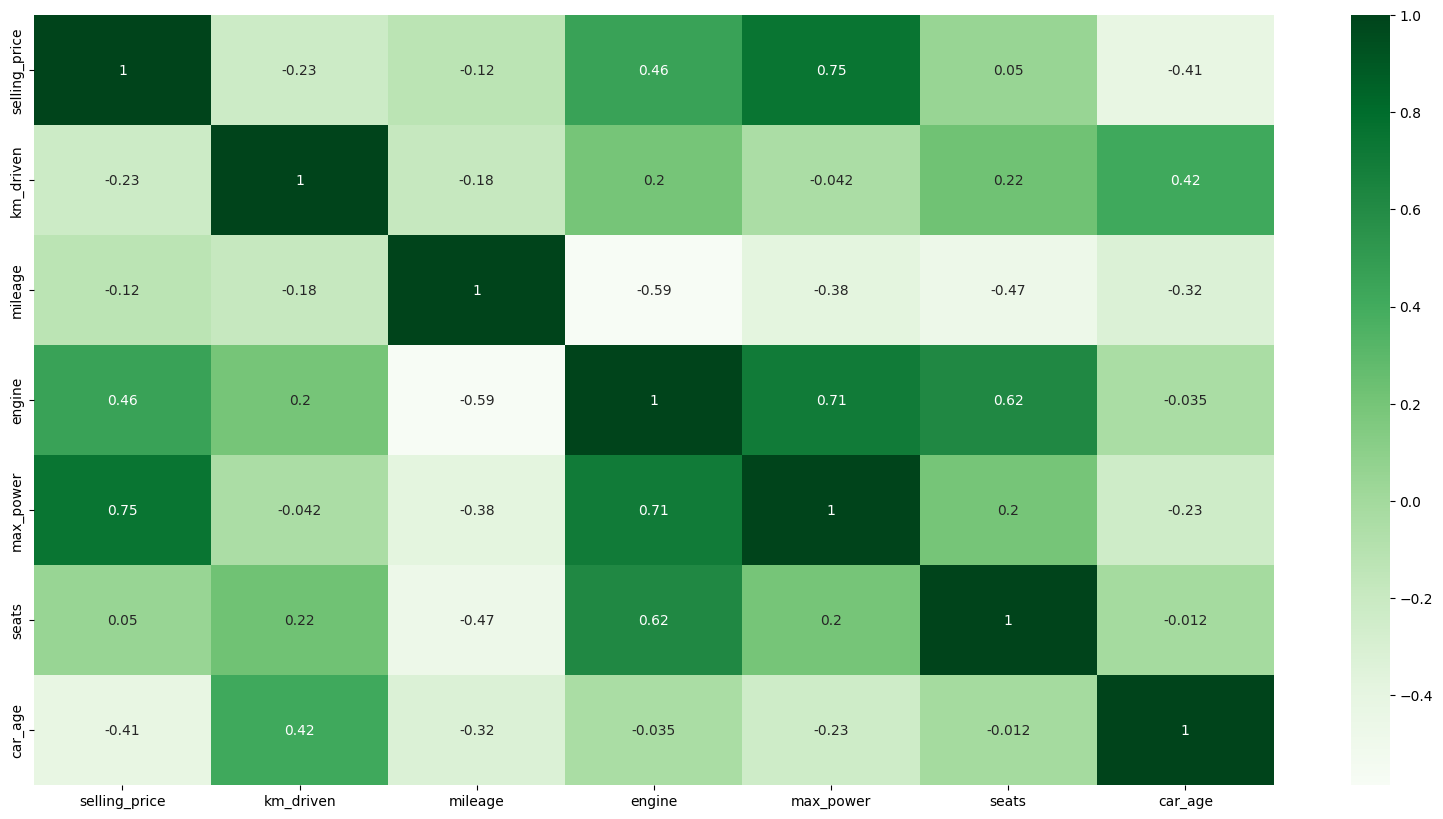

In [28]:
plt.figure(figsize = [20,10])
sns.heatmap(carData[numeric_cols].corr(),cmap = "Greens", annot = True, linecolor = "white")

<div style = "font-family: Garamond; font-size : 20px;"> Created a heatmap to verify if inferences from the pairplot were true or not. <span style = "color : red; font-weight: bold"> engine & max_power </span> are highly correlated to <span style = "color : red; font-weight: bold"> selling_price </span> </div>

<ul style = "font-family: Garamond; font-size : 20px; border : 2px solid black; border-radius: 10px; padding: 20px"><li style = "margin-left: 5%"> Relationship of selling price with other variables like - mileage, km driven, seats, owner, year, car_age. </li></ul>

<Axes: xlabel='seats', ylabel='selling_price'>

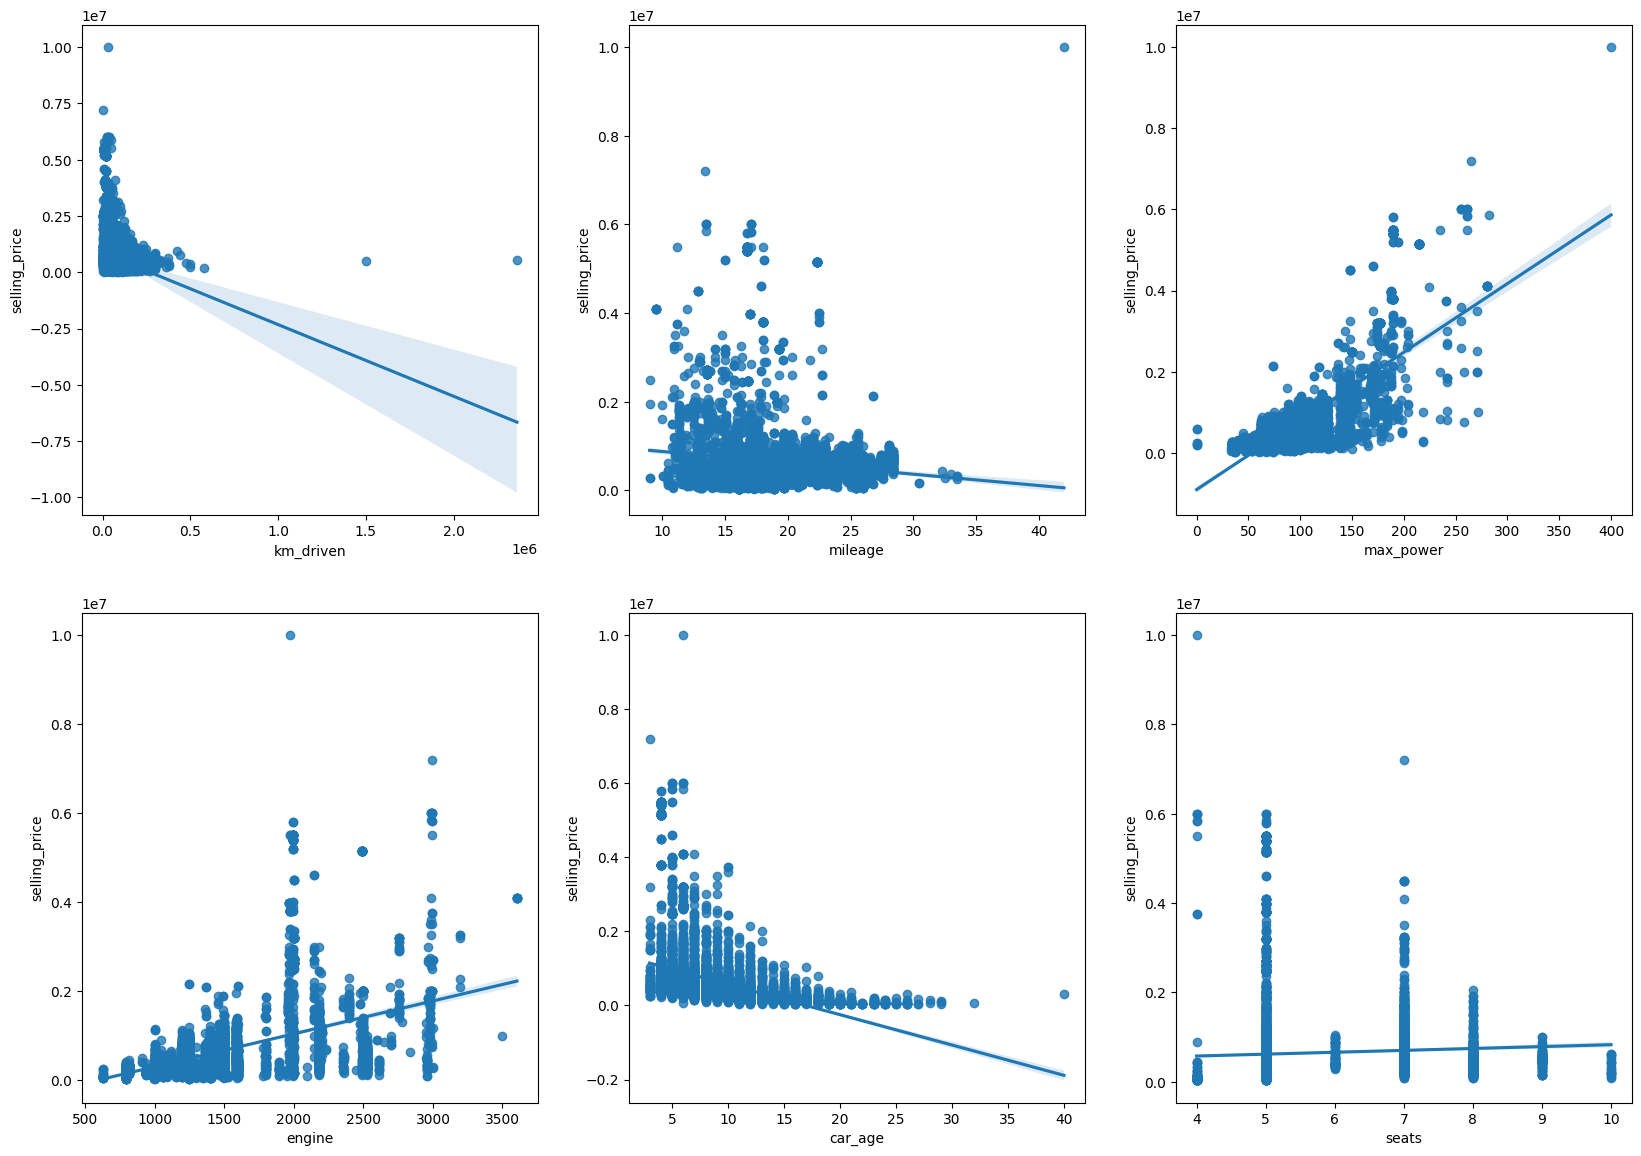

In [29]:
fig, axes = plt.subplots(2,3,figsize = (20,14))
axes = axes.flatten()

sns.regplot(data = carData, x = 'km_driven', y = 'selling_price', ax = axes[0])
sns.regplot(data = carData, x = "mileage", y = "selling_price", ax = axes[1])
sns.regplot(data = carData, x = "max_power", y = "selling_price", ax = axes[2])
sns.regplot(data = carData, x = "engine", y = "selling_price", ax = axes[3])
sns.regplot(data = carData, x = "car_age", y = "selling_price", ax = axes[4])
sns.regplot(data = carData, x = "seats", y = "selling_price", ax = axes[5])

<Axes: xlabel='seats', ylabel='selling_price'>

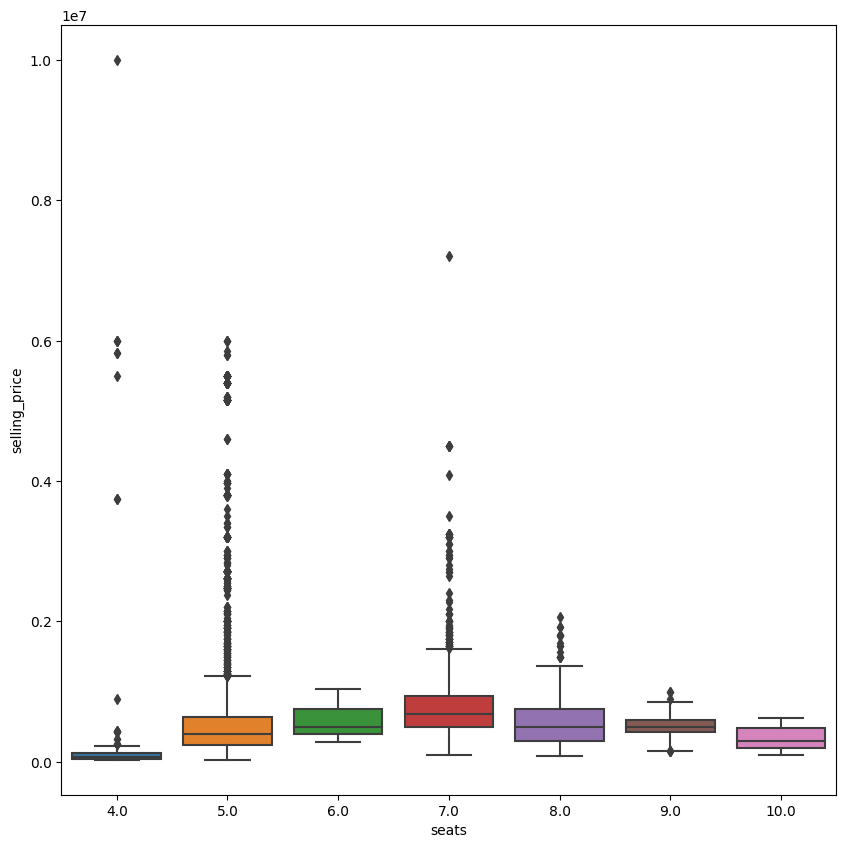

In [30]:
plt.figure(figsize = (10,10))
sns.boxplot(data = carData, x = "seats", y = "selling_price")

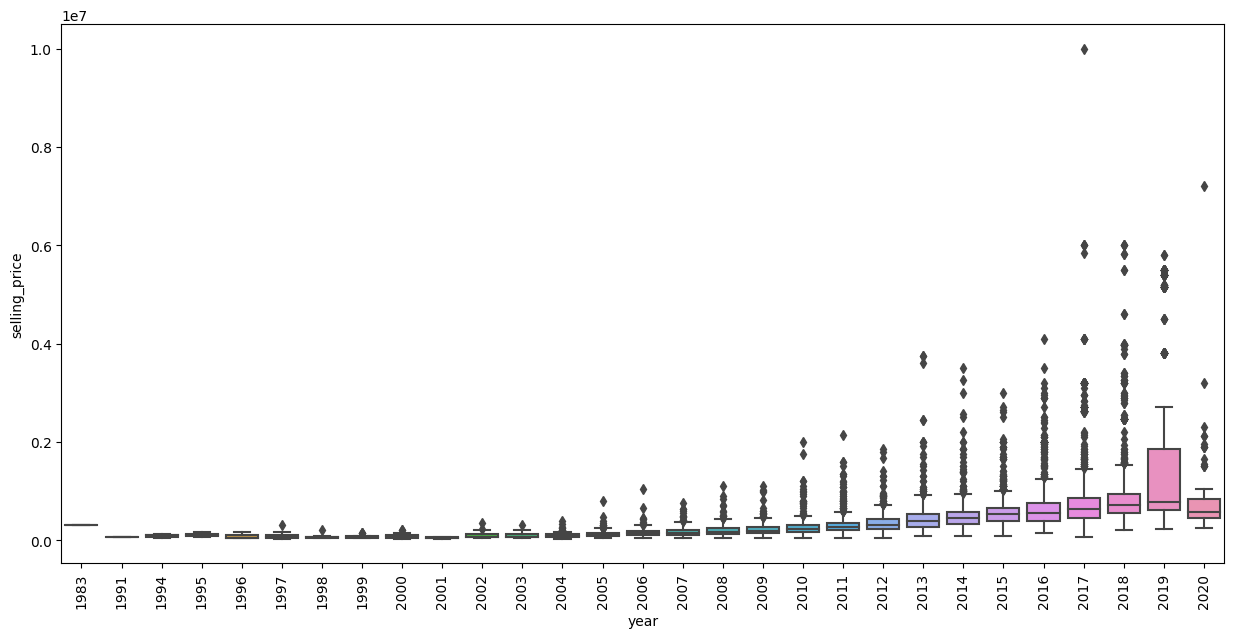

In [31]:
plt.figure(figsize = (15,7))
sns.boxplot(data = carData, x = "year", y = "selling_price")
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='transmission', ylabel='selling_price'>

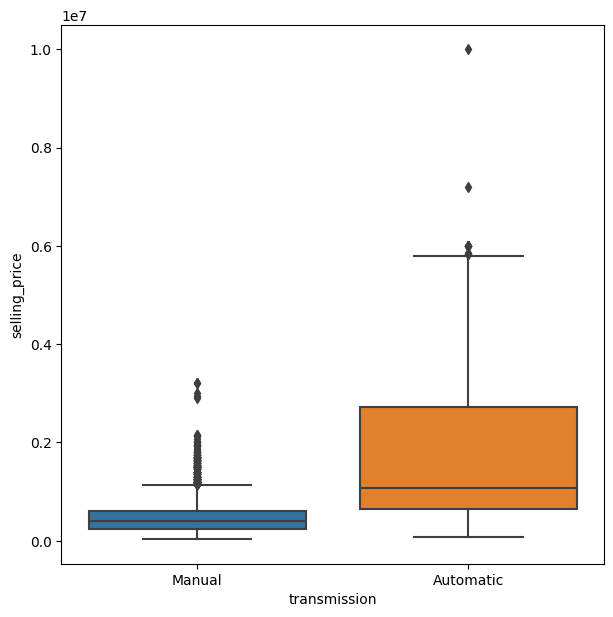

In [32]:
plt.figure(figsize = (7,7))
sns.boxplot(data = carData, x = "transmission", y = "selling_price")

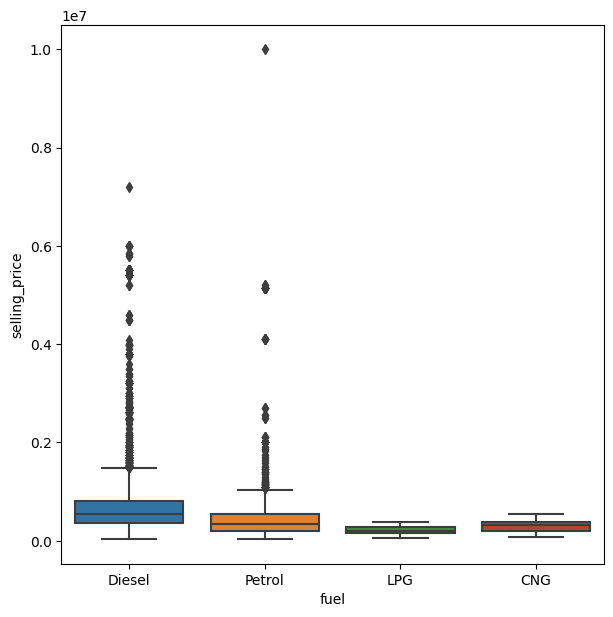

In [33]:
plt.figure(figsize = (7,7))
sns.boxplot(data = carData, x = "fuel", y = "selling_price")
plt.show()

<ul style = "border : 2px dashed black; border-radius: 10px; padding: 20px"><label style = "font-family: Garamond; font-size : 20px; text-transform : uppercase "> Insights from the above plot : </label>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> It seems that as the km_driven increases, the selling_price decreases, which makes sense. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Selling price and mileage are directly proportional, as expected. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> As the number of owner decreases, the price increases. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Automatic Transmission vehicles sell at a higher price. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Newer car also sell at higher price expect the year 2020. (This affect is mostly due to pendemic) Most patterns are as one would expect. </li>
</ul> 

<Axes: >

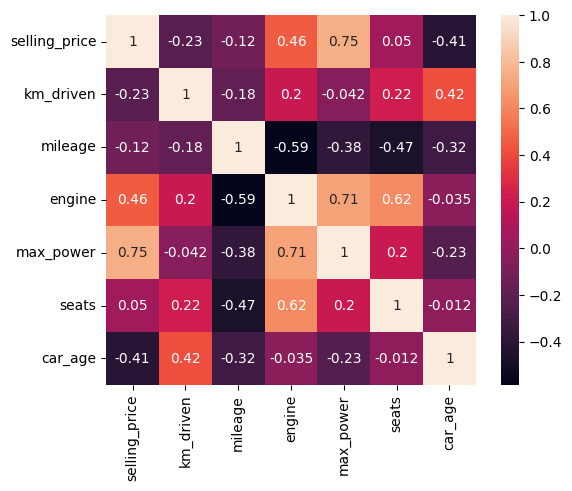

In [34]:
sns.heatmap(carData[numeric_cols].corr(), square = True, annot = True)

<p style = "font-family: Garamond; font-size : 20px; font-weight : bold; text-transform : uppercase; border : 2px solid black; border-radius: 10px; padding: 20px;"> Fix skewness of the variables </p>

In [35]:
print("Basic descriptive statistics of the target variable - 'selling_price' : \n\n", carData['selling_price'].describe())

Basic descriptive statistics of the target variable - 'selling_price' : 

 count    8.105000e+03
mean     6.358396e+05
std      7.990270e+05
min      2.999900e+04
25%      2.549990e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.000000e+07
Name: selling_price, dtype: float64


<ul style = "border : 2px dashed black; border-radius: 10px; padding: 20px"><label style = "font-family: Garamond; font-size : 20px; text-transform : uppercase "> Basic statistics of the target variable - 'selling_price' : </label>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Average of the target variable is 635,839.60 INR. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Standard Deviation of the target variable is 799,027.00 INR. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Minimum of the target variable is 29,999 INR. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Maximum of the target variable is 10,000,000 INR. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Median of the target variable is 450,000 INR. </li>
</ul> 

<div style = "font-family: calibri; font-size : 15px; text-align: justify;"> A continuous distribution of random values is called a normal distribution. A random value is one of that depends on the outcome of a random event. For example, you either get heads or tails when you flip a coin. But you cannot determine with certainty what you will get. When you're  plotting against something that has only a probable chance of happening, you will get a probability distribution. The probability of random values that can take on value is known as a continuous probability distribution. The number of values that the probability has are infinite of writing the probability variables you can define the range in which they lie. </div>

### Skewness

<div style = "font-family: calibri; font-size : 15px; text-align: justify;"> In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.</div></br>

<div style = "font-family: calibri; font-size : 15px; text-align: justify;">Consider the two distributions in the figure just below. Within each graph, the values on the right side of the distribution taper differently from the values on the left side. These tapering sides are called tails, and they provide a visual means to determine which of the two kinds of skewness a distribution has: </div>
</br>
<img src = "Negative_and_positive_skew_diagrams_(English).png">
</br>
<div style = "font-family: calibri; font-size : 15px; text-align: justify;">Negative skew: The left tail is longer; the mass of the distribution is concentrated on the right of the figure. The distribution is said to be left-skewed, left-tailed, or skewed to the left, despite the fact that the curve itself appears to be skewed or leaning to the right; left instead refers to the left tail being drawn out and, often, the mean being skewed to the left of a typical center of the data. A left-skewed distribution usually appears as a right-leaning curve. </div>
</br>
<div style = "font-family: calibri; font-size : 15px; text-align: justify;">Positive skew: The right tail is longer; the mass of the distribution is concentrated on the left of the figure. The distribution is said to be right-skewed, right-tailed, or skewed to the right, despite the fact that the curve itself appears to be skewed or leaning to the left; right instead refers to the right tail being drawn out and, often, the mean being skewed to the right of a typical center of the data. A right-skewed distribution usually appears as a left-leaning curve. </div>

<ul style = "font-family: calibri; font-size : 15px; text-align: justify; padding: 10px">
    <li style = "margin-left: 5%"> Skewness = 0 when the distribution. </li>
    <li style = "margin-left: 5%"> Skewness > 0 or positive when more weight is on the left side of the distribution. </li>
    <li style = "margin-left: 5%"> Skewness < 0 or negative when more weight is on the right side of the distribution. </li>
</ul>

### Kurtosis

<div style = "font-family: calibri; font-size : 15px; text-align: justify;"> Kurtosis is a statistical term that characterizes  frequency distribution. Aside from determining if a distribution is heavy-tailed, it also provides insight into the shape of the frequency distribution. </div>
<ul style = "font-family: calibri; font-size : 15px; text-align: justify; padding: 10px">
    <li style = "margin-left: 5%"> Kurtosis of normal distribution is equal to 3. </li>
    <li style = "margin-left: 5%"> When the kurtosis is less than 2, it is known as platykurtic. </li>
    <li style = "margin-left: 5%"> When the Kurtosis is greater than 3, it is known leptokurtic. </li>
</ul>

In [36]:
print("Skewness of target variable : {}".format(carData['selling_price'].skew()))
print("Kurtosis of target variable : {}".format(carData['selling_price'].kurt()))

Skewness of target variable : 4.196750552857821
Kurtosis of target variable : 21.174444307976245


<ul style = "border : 2px dashed black; border-radius: 10px; padding: 20px"><label style = "font-family: Garamond; font-size : 20px; text-transform : uppercase "> Positive skewness and high kurtosis </label>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Positive skewness, more weight is on the left side of the distribution. </li>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Kurtosis is greater than 3. It is leptokurtic. </li>
</ul> 

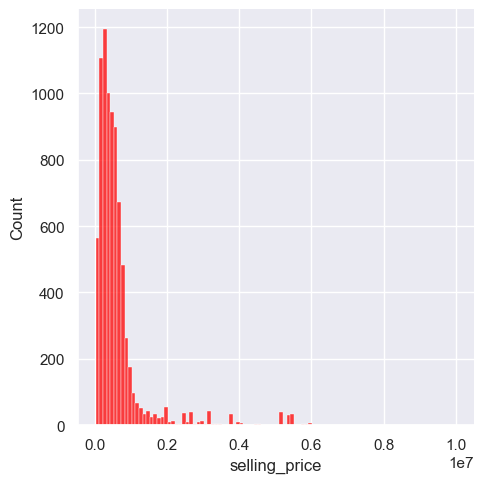

In [37]:
sns.set(rc = {"figure.figsize" : (12,7)})
sns.displot(carData['selling_price'], bins = 100, color = 'red')

<ul style = "border : 2px dashed black; border-radius: 10px; padding: 20px">
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Positive skewness from the graph above. As the graph shows, more weight is on the left side of the distribution. Try to fix it using "log1p" function of numpy. </li>
</ul> 

In [38]:
carData['selling_price'] = np.log1p(carData['selling_price'])

In [39]:
carData['selling_price'].head(10)

0    13.017005
1    12.821261
2    11.970357
3    12.323860
4    11.775297
5    12.994532
6    11.472114
7    10.714440
8    12.765691
9    12.206078
Name: selling_price, dtype: float64

<Axes: xlabel='selling_price', ylabel='Density'>

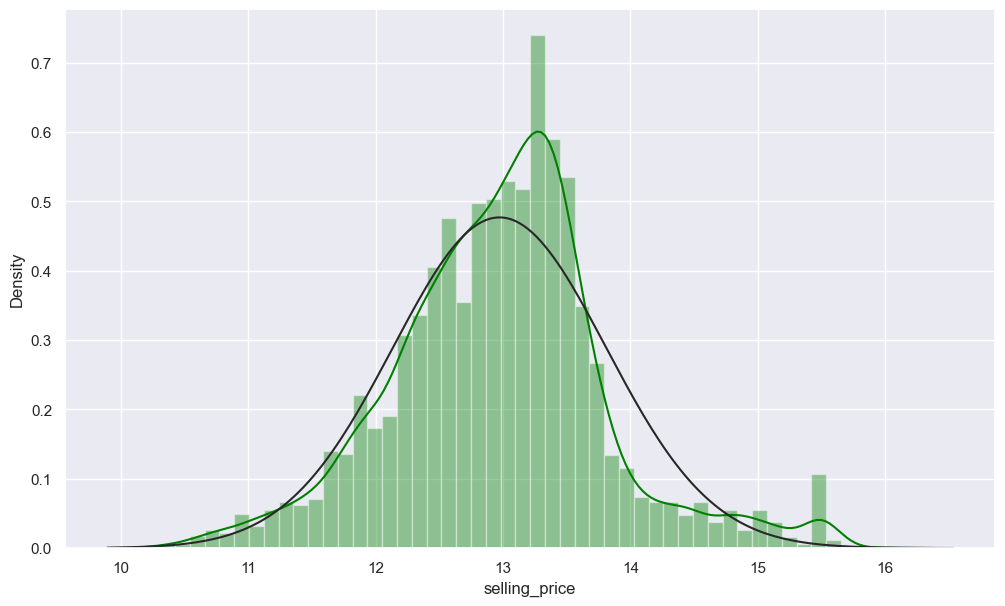

In [40]:
sns.distplot(carData['selling_price'], color = "green", fit = norm)

In [41]:
numeric_data = [column for column in carData.select_dtypes(["int", "float"])]
for col in numeric_data:
    print("Skewness of {} variable is {}".format(col,carData[col].skew()))

Skewness of year variable is -1.0766103339564823
Skewness of selling_price variable is 0.21575162409463391
Skewness of km_driven variable is 11.178671622512745
Skewness of mileage variable is 0.08502412446254559
Skewness of engine variable is 1.1756501336733318
Skewness of max_power variable is 1.6677642923846372
Skewness of seats variable is 1.9708528007464776
Skewness of car_age variable is 1.0766103339565058


In [42]:
for c in numeric_data:
    carData[c] = np.log1p(carData[c])

<ul style = "border : 2px dashed black; border-radius: 10px; padding: 20px"><label style = "font-family: Garamond; font-size : 20px; text-transform : uppercase "> All skewness fixed </label>
    <li style = "font-family:Ink Free; font-size : 15px; margin-left: 5%; letter-spacing:2px; font-weight: bold"> Fix the skewness of all other variables. So let's continue... </li>
</ul> 

<a id="4"></a>
<div style = "font-family: Copperplate Gothic Light; font-size: 30px; border : 3px solid black; border-radius: 50px 0; padding: 20px; background : blue; color: #FFF; text-align: center"> Data Preprocessing </div>

In [43]:
carData.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,brand
0,7.608374,2.640271,11.887938,Diesel,Individual,Manual,First Owner,3.194583,7.130099,4.317488,1.791759,2.302585,Maruti
1,7.608374,2.626208,11.695255,Diesel,Individual,Manual,Second Owner,3.097386,7.312553,4.649378,1.791759,2.302585,Skoda
2,7.604396,2.562666,11.849405,Petrol,Individual,Manual,Third Owner,2.928524,7.311886,4.369448,1.791759,2.890372,Honda
3,7.606387,2.589556,11.751950,Diesel,Individual,Manual,First Owner,3.178054,7.242082,4.510860,1.791759,2.639057,Hyundai
4,7.604894,2.547513,11.695255,Petrol,Individual,Manual,First Owner,2.839078,7.169350,4.490881,1.791759,2.833213,Maruti


In [44]:
final_df = carData.copy() # Creating copy of created dataframe
final_df.drop(labels= ['year','brand'], axis= 1, inplace= True) #droping unnecessary features
final_df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,2.640271,11.887938,Diesel,Individual,Manual,First Owner,3.194583,7.130099,4.317488,1.791759,2.302585
1,2.626208,11.695255,Diesel,Individual,Manual,Second Owner,3.097386,7.312553,4.649378,1.791759,2.302585
2,2.562666,11.849405,Petrol,Individual,Manual,Third Owner,2.928524,7.311886,4.369448,1.791759,2.890372
3,2.589556,11.751950,Diesel,Individual,Manual,First Owner,3.178054,7.242082,4.510860,1.791759,2.639057
4,2.547513,11.695255,Petrol,Individual,Manual,First Owner,2.839078,7.169350,4.490881,1.791759,2.833213


In [45]:
final_df.describe()

,selling_price,km_driven,mileage,engine,max_power,seats,car_age
count,8105.000000,8105.000000,8105.000000,8105.000000,8105.000000,8105.000000,8105.000000
mean,2.635302,10.861178,2.999107,7.229679,4.457575,1.847970,2.248296
std,0.059858,0.874066,0.196471,0.315320,0.363045,0.131264,0.382324
min,2.425595,0.693147,2.302585,6.437752,0.000000,1.609438,1.386294
25%,2.598906,10.463132,2.879198,7.088409,4.248495,1.791759,1.945910
50%,2.640271,11.002117,3.003700,7.130099,4.417152,1.791759,2.197225
75%,2.668787,11.492733,3.148453,7.367077,4.621044,1.791759,2.564949
max,2.840136,14.674366,3.761200,8.190077,5.993961,2.397895,3.713572


In [46]:
final_df['transmission'].replace(["Automatic",'Manual'], [0,1], inplace = True)

In [47]:
scaler = MinMaxScaler()
scaler_cols = ['km_driven','mileage','engine','max_power', 'seats', 'car_age', 'transmission']
final_df[scaler_cols] = scaler.fit_transform(final_df[scaler_cols])
final_df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,2.640271,0.800702,Diesel,Individual,1.0,First Owner,0.611538,0.395102,0.720306,0.231238,0.393718
1,2.626208,0.786921,Diesel,Individual,1.0,Second Owner,0.544901,0.499223,0.775677,0.231238,0.393718
2,2.562666,0.797946,Petrol,Individual,1.0,Third Owner,0.429132,0.498843,0.728975,0.231238,0.646282
3,2.589556,0.790976,Diesel,Individual,1.0,First Owner,0.600205,0.459008,0.752567,0.231238,0.538295
4,2.547513,0.786921,Petrol,Individual,1.0,First Owner,0.367810,0.417501,0.749234,0.231238,0.621722


<ul style = "font-family: Garamond; font-size : 20px; border : 2px solid black; border-radius: 10px; padding: 20px"><li style = "margin-left: 5%"> Convert Categorical variable into numerical </li></ul>

*Here, using One Hot Encoding / get_dummies to convert categorical variables to numerical.*

In [48]:
owner_dummie = pd.get_dummies(final_df["owner"])
fuel_dummie = pd.get_dummies(final_df["fuel"])
seller_type_dummie = pd.get_dummies(final_df["seller_type"])

In [49]:
owner_dummie = owner_dummie.astype('int64')
fuel_dummie = fuel_dummie.astype('int64')
seller_type_dummie = seller_type_dummie.astype('int64')

In [50]:
final_df.drop(columns = ['fuel', 'owner', 'seller_type'], inplace = True)

In [51]:
final_df = pd.concat([final_df, owner_dummie, fuel_dummie, seller_type_dummie])

In [52]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32420 entries, 0 to 8127
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   selling_price         8105 non-null   float64
 1   km_driven             8105 non-null   float64
 2   transmission          8105 non-null   float64
 3   mileage               8105 non-null   float64
 4   engine                8105 non-null   float64
 5   max_power             8105 non-null   float64
 6   seats                 8105 non-null   float64
 7   car_age               8105 non-null   float64
 8   First Owner           8105 non-null   float64
 9   Fourth & Above Owner  8105 non-null   float64
 10  Second Owner          8105 non-null   float64
 11  Third Owner           8105 non-null   float64
 12  CNG                   8105 non-null   float64
 13  Diesel                8105 non-null   float64
 14  LPG                   8105 non-null   float64
 15  Petrol                810

In [53]:
final_df.fillna(0,inplace = True)

In [54]:
final_df.head()

,selling_price,km_driven,transmission,mileage,engine,max_power,seats,car_age,First Owner,Fourth & Above Owner,Second Owner,Third Owner,CNG,Diesel,LPG,Petrol,Dealer,Individual,Trustmark Dealer
0,2.640271,0.800702,1.0,0.611538,0.395102,0.720306,0.231238,0.393718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.626208,0.786921,1.0,0.544901,0.499223,0.775677,0.231238,0.393718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.562666,0.797946,1.0,0.429132,0.498843,0.728975,0.231238,0.646282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.589556,0.790976,1.0,0.600205,0.459008,0.752567,0.231238,0.538295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.547513,0.786921,1.0,0.367810,0.417501,0.749234,0.231238,0.621722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

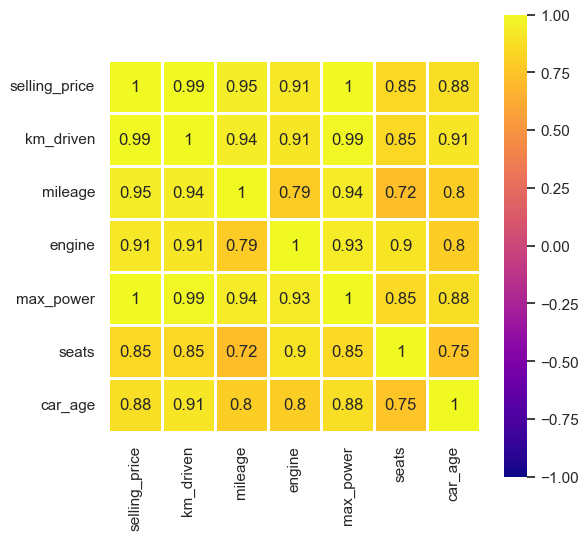

In [55]:
plt.figure(figsize=(6,6))
sns.heatmap(data = final_df[numeric_cols].corr(), annot = True, square = True, cmap = 'plasma', vmin = -1 , vmax = 1, linecolor ='white', linewidths = 2)

<a id="5"></a>
<div style = "font-family: Copperplate Gothic Light; font-size: 30px; border : 3px solid black; border-radius: 50px 0; padding: 20px; background : blue; color: #FFF; text-align: center"> Splitting Dataset into Train & Test sets </div>

In [56]:
X = final_df.iloc[:, 1:]            # Feature matrix (independent variables)
y = final_df.iloc[:, 0]             # Target variable (dependent variable)

In [57]:
# To check important feature
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [58]:
print(model.feature_importances_)

[0.46520192 0.04167971 0.01288204 0.02906221 0.41137471 0.02963554
 0.01016387 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


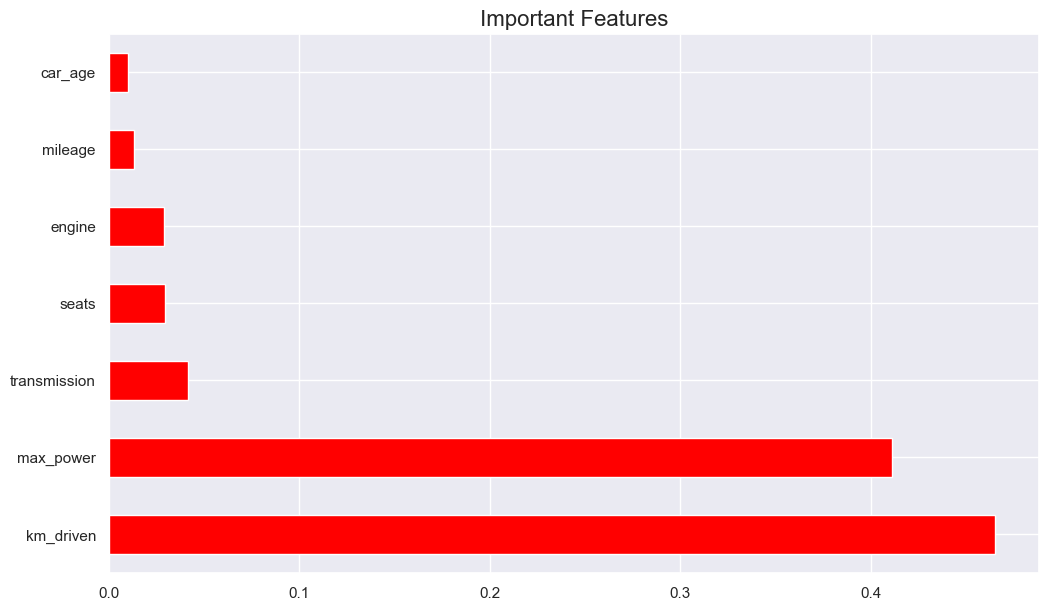

In [59]:
#plot graph of feature importances for better visualization

imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

<a id="6"></a>
<div style = "font-family: Copperplate Gothic Light; font-size: 30px; border : 3px solid black; border-radius: 50px 0; padding: 20px; background : blue; color: #FFF; text-align: center"> Model Building </div>

In [61]:
models = [LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))

In [62]:
# create a new DataFrame from the above three lists
MLModels_df = pd.DataFrame({"Models": [ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Ridge', 'Lasso'],
                           "Mean Squared Error": mse,
                           "Root Mean Squared Error": rmse,
                           "Explained Variance Score": evs,
                           "R-Square Score / Accuracy": r_square_score})

MLModels_df.set_index('Models', inplace=True)
MLModels_df.head()

,Mean Squared Error,Root Mean Squared Error,Explained Variance Score,R-Square Score / Accuracy
Models,,,,
Linear Regression,0.000156,0.012486,0.999880,0.999880
Support Vector Rregression,0.007864,0.088678,0.998119,0.993943
Decision Tree Regressor,0.000107,0.010335,0.999918,0.999918
Random Forest Regressor,0.000073,0.008517,0.999944,0.999944
Ridge,0.000666,0.025810,0.999487,0.999487


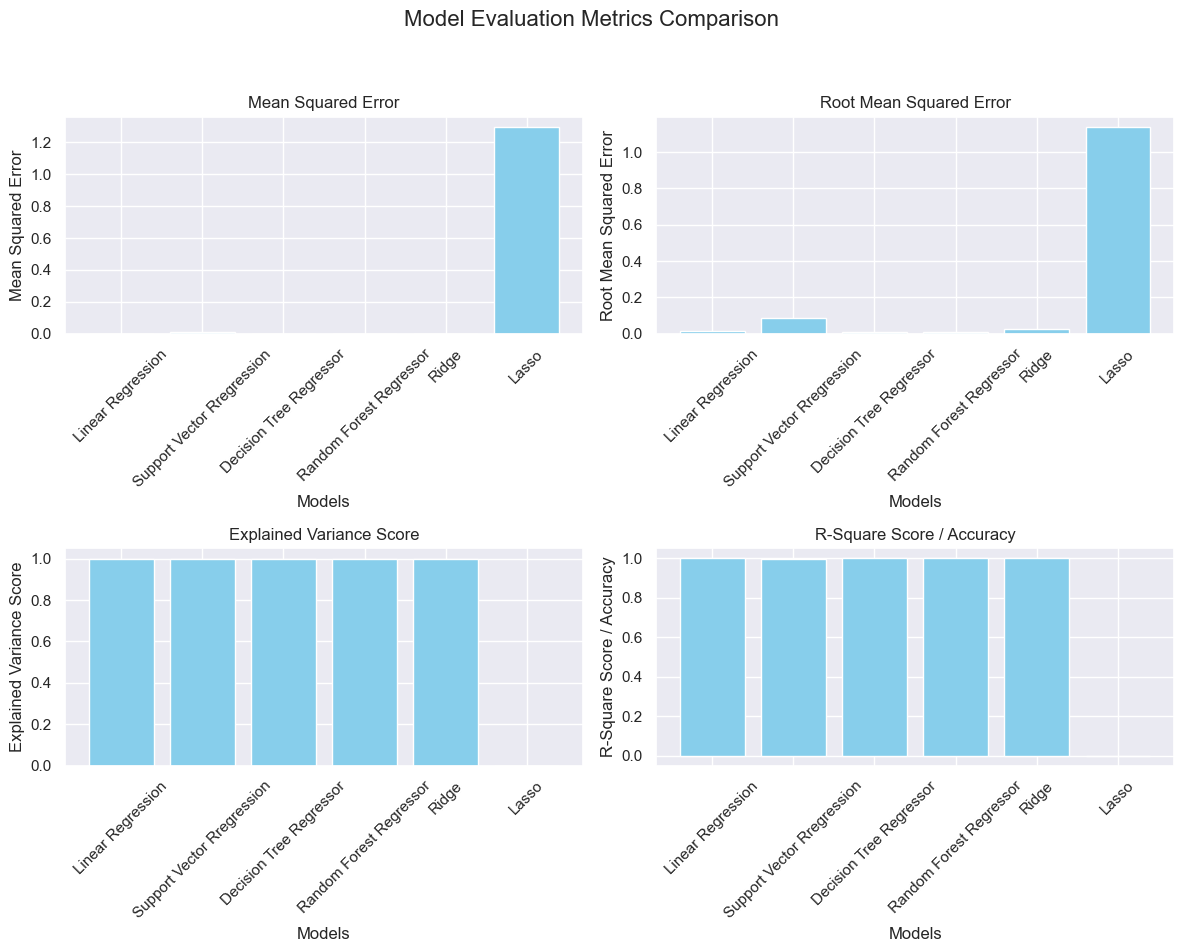

In [63]:
import matplotlib.pyplot as plt

# Assuming MLModel_df is your DataFrame
models = MLModels_df.index
metrics = ['Mean Squared Error', 'Root Mean Squared Error', 'Explained Variance Score', 'R-Square Score / Accuracy']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Model Evaluation Metrics Comparison', fontsize=16)

for i in range(len(metrics)):
    row, col = i // 2, i % 2
    metric_values = MLModels_df[metrics[i]]
    axes[row, col].bar(models, metric_values, color='skyblue')
    axes[row, col].set_title(metrics[i])
    axes[row, col].set_xlabel('Models')
    axes[row, col].set_ylabel(metrics[i])
    axes[row, col].tick_params(axis='x', rotation=45, labelrotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


***Random Forest Regressor have minimum 'RMSE' and high accuracy.*** 

In [64]:
regressor = RandomForestRegressor()

## Hyperparameters 
# number of trees
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# number of features
max_features = ['auto', 'sqrt']

# max number of levels in tree
max_depth = [int(x) for x in np.linspace(start= 5, stop= 30, num= 6)]

# min. number of sample required to split a node
min_samples_split = [2,5,10,15,100]

# min. number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [65]:
# Create the random grid
random_grid= {'n_estimators': n_estimators, 
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [66]:
regressor_random = RandomizedSearchCV(estimator=  regressor, param_distributions=  random_grid, scoring= 'neg_mean_squared_error', \
                                      n_iter = 5, cv=5, verbose = 2, random_state=0, n_jobs=1)
regressor_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=  12.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=  15.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=  12.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=  11.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=  11.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=  10.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   9.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [67]:
y_predictions = regressor_random.predict(X_test)
y_predictions

array([0.        , 0.        , 2.58589879, ..., 0.        , 2.64913939,
       0.        ])

<h3 style = "font-family: Copperplate Gothic Light; font-size: 20px; border : 3px solid black; border-radius: 10px; padding: 20px"> Predicting Test Data by visualizing </h3>

*Evaluate its performance by predicting the test values and visualize the results.*

Text(0.5, 1.0, 'True value Vs Predicted values of Selling Price')

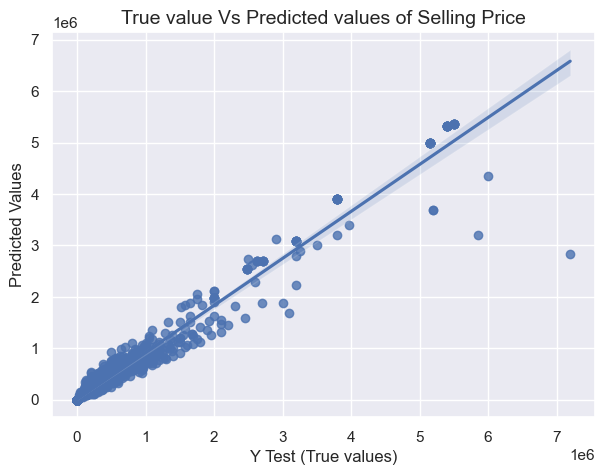

In [68]:
plt.figure(figsize=(7,5))
sns.regplot(x = np.expm1(np.expm1(y_test)), y = np.expm1(np.expm1(y_predictions)))
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted Values')
plt.title('True value Vs Predicted values of Selling Price', fontsize=14)

<h3 style = "font-family: Copperplate Gothic Light; font-size: 20px; border : 3px solid black; border-radius: 10px; padding: 20px"> Residuals </h3>

*Explore the residuals to make sure everything was okay with the data (i.e. it is Normally distributed).*

<Axes: xlabel='selling_price', ylabel='Density'>

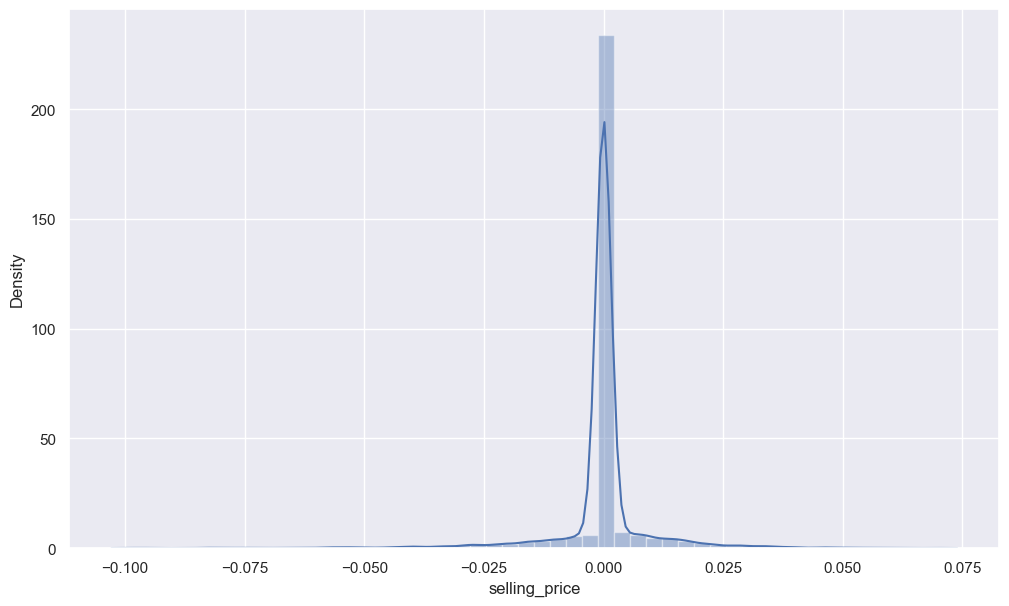

In [69]:
sns.distplot(y_test - y_predictions)

<a id="7"></a>
<div style = "font-family: Copperplate Gothic Light; font-size: 30px; border : 3px solid black; border-radius: 50px 0; padding: 20px; background : blue; color: #FFF; text-align: center"> Model Evaluation </div>

In [70]:
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_predictions))
print('Mean Squareed Error: ', mean_squared_error(y_test, y_predictions))
print('Root Mean Square Error: ', np.sqrt(mean_squared_error(y_test, y_predictions)))
print('Explaned Variance Score: ', explained_variance_score(y_true= y_test, y_pred= y_predictions))
print('Accuracy: ', r2_score(y_test, y_predictions))

Mean Absolute Error:  0.0033146239851692735
Mean Squareed Error:  8.593774347214888e-05
Root Mean Square Error:  0.00927026124077142
Explaned Variance Score:  0.9999338127983369
Accuracy:  0.9999338031395478


<a id="8"></a>
<div style = "font-family: Copperplate Gothic Light; font-size: 30px; border : 3px solid black; border-radius: 50px 0; padding: 20px; background : blue; color: #FFF; text-align: center"> Generate the pickle file </div>

In [71]:
import pickle
file = open('rf_regression_model.pkl', 'wb')

# dump information on that file
pickle.dump(regressor_random, file)

<a id="9"></a>
<div style = "font-family: Copperplate Gothic Light; font-size: 30px; border : 3px solid black; border-radius: 50px 0; padding: 20px; background : blue; color: #FFF; text-align: center"> Testing Model by User Input </div>

In [72]:
km_driven = int(input("Enter Kilometer Driven: "))
mileage = float(input("Enter Mileage: "))
engine = float(input("Enter Engine CC: "))
max_power = float(input("Enter Max Power: "))
seats = float(input("Enter Seats: "))
year = int(input("Enter Year: "))

car_age  = (datetime.datetime.now().year) - (year)


# Owner input
owner = int(input("Enter Owner: "))
if owner == 1:
    First_Owner = 1.0
    Second_Owner = 0.0
    Third_Owner = 0.0
    Fourth_Above_Owner = 0.0
elif owner == 2:
    First_Owner = 0.0
    Second_Owner = 1.0
    Third_Owner = 0.0
    Fourth_Above_Owner = 0.0
elif owner == 3:
    First_Owner = 0.0
    Second_Owner = 0.0
    Third_Owner = 1.0
    Fourth_Above_Owner = 0.0
elif owner == 4:
    First_Owner = 0.0
    Second_Owner = 0.0
    Third_Owner = 0.0
    Fourth_Above_Owner = 1.0
else:
    print("Invalid Entry!")

# Fuel type input 
fuel = int(input("Enter Fuel (1 : CNG, 2 : Diesel, 3 : Petrol, 4 : LPG): "))
if fuel == 1:
    CNG = 1.0
    Diesel = 0.0
    Petrol = 0.0
    LPG = 0.0
elif fuel == 2:
    CNG = 0.0
    Diesel = 1.0
    Petrol = 0.0
    LPG = 0.0
elif fuel == 3:
    CNG = 0.0
    Diesel = 0.0
    Petrol = 1.0
    LPG = 0.0
elif fuel == 4:
    CNG = 0.0
    Diesel = 0.0
    Petrol = 0.0
    LPG = 1.0
else:
    print("Invalid Entry!")

# Seller type input
seller_type = int(input("Enter Seller Type (1 : Dealer, 2 : Individual, 3 : Trustmark Dealer): "))
if seller_type == 1:
    Dealer = 1.0
    Individual = 0.0 
    Trustmark_Dealer = 0.0
elif seller_type == 2:
    Dealer = 0.0
    Individual = 1.0 
    Trustmark_Dealer = 0.0
elif seller_type == 3:
    Dealer = 0.0
    Individual = 0.0 
    Trustmark_Dealer = 1.0
else:
    print("Invalid Entry!")

# Transmission input
transmission = int(input("Enter Transmission (1 : Automatic, 2 : Manual): "))
if transmission == 1:
    transmission = 0.0
elif transmission == 2:
    transmission = 1.0
else:
    print("Invalid Entry!")

    
data = {
    'km_driven' : [km_driven], 
    'transmission' : [transmission], 
    'mileage' : [mileage], 
    'engine' : [engine], 
    'max_power' : [max_power], 
    'seats' : [seats],
    'car_age' : [car_age],
    'First Owner' : [First_Owner], 
    'Fourth & Above Owner' : [Fourth_Above_Owner], 
    'Second Owner' : [Second_Owner], 
    'Third Owner': [Third_Owner],
    'CNG' : [CNG],
    'Diesel' : [Diesel], 
    'LPG' : [LPG], 
    'Petrol' : [Petrol],
    'Dealer' : [Dealer], 
    'Individual' : [Individual], 
    'Trustmark Dealer' : [Trustmark_Dealer]
} 

df = pd.DataFrame(data)
df

Enter Kilometer Driven: 145500
Enter Mileage: 23.4
Enter Engine CC: 1248
Enter Max Power: 74
Enter Seats: 5
Enter Year: 2014
Enter Owner: 1
Enter Fuel (1 : CNG, 2 : Diesel, 3 : Petrol, 4 : LPG): 2
Enter Seller Type (1 : Dealer, 2 : Individual, 3 : Trustmark Dealer): 2
Enter Transmission (1 : Automatic, 2 : Manual): 2


,km_driven,transmission,mileage,engine,max_power,seats,car_age,First Owner,Fourth & Above Owner,Second Owner,Third Owner,CNG,Diesel,LPG,Petrol,Dealer,Individual,Trustmark Dealer
0,145500,1.0,23.4,1248.0,74.0,5.0,9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [73]:
model = pickle.load(open('rf_regression_model.pkl', 'rb'))
pred = model.predict(df)
print("Predicted Price is {} INR".format(round(np.expm1(np.expm1(pred))[0],2)))

Predicted Price is 27370.73 INR
